# Road Traffic Severity Classification Prediction

### About Data
This dataset is collected from Addis Ababa Sub-city police departments for 
master's research work. The data set has been prepared from manual records of 
road traffic accidents of the year 2017-20. All the sensitive information has been 
excluded during data encoding and finally it has 32 features and 12316 instances 
of the accident. Then it is preprocessed and for identification of major causes of 
the accident by analyzing it using different machine learning classification 
algorihms. ithms. 

### Problem Statement
The target feature is Accident_severity which is a multi-class variable. The 
task is to classify this variable based on the other 31 features step-by-step by 
going through each day's task. Your metric for evaluation will be f1-screthms. 

## 00_Step Importing required Libraries

### Importing the required librariesFollowint librairies are used to complete this project.. 

In [1]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from phik.report import plot_correlation_matrix
from skimpy import skim
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# feature engineering libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder, OrdinalEncoder , OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, chi2 , SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# model preparation libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC , NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier , XGBRFClassifier

# model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold, StratifiedKFold

# model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## 01. Data Wrangling

- Data Gathering
- Data Accessing
- Data Cleaning

#### Data Gethering

### Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

In [2]:
# Reset display options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [3]:
dataset = pd.read_csv("RTA Dataset.csv")
dataset.head(2)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   

  Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0             na              na                   na                na   
1             na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   

  Cause_of_accident Accident_severity  
0   Moving Backward     Slight Injury  
1        Overtaking     Slight Injury  

[2 rows x 32 columns]

In [4]:
# Removing white spaces and converting Time in hours and time formate
dateset = dataset.map(lambda x: x.strip() if isinstance(x, str) else x)
# dataset["Time"] = pd.to_timedelta(dataset["Time"])
dataset["Hour_of_day"] = pd.to_timedelta(dataset["Time"]).dt.components['hours']

In [5]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12316  │ │ string      │ 30    │                                                          │
│ │ Number of columns │ 33     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Number_of_vehicles_involve │    0 │      0 │      2 │   0.69 │   1 │     2 │    2 │    2 │     7 │   ▂▇▂   │  │
│ │ d                          │      │        │        │        │     │       │      │      │       │         │  │
│ │ Number_of_casualties       │    0 │      0 │    1.5 │      1 │   1 │     1 │    1 │    2 │     8 │   ▇▁    │  │
│ │ Hour_of_day                │    0 │      0 │     14 │    5.2 │   0 │    10 │   15 │   18 │    23 │ ▁▂▅▆▇▃  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time                                │        0 │          0 │                       1 │              12316 │  │
│ │ Day_of_week                         │        0 │          0 │                       1 │              12316 │  │
│ │ Age_band_of_driver                  │        0 │          0 │                     1.2 │              14726 │  │
│ │ Sex_of_driver                       │        0 │          0 │                       1 │              12316 │  │
│ │ Educational_level                   │      741 │       6.02 │                     2.5 │              31162 │  │
│ │ Vehicle_driver_relation             │      579 │        4.7 │                    0.95 │              11737 │  │
│ │ Driving_experience                  │      829 │       6.73 │                     1.2 │              15209 │  │
│ │ Type_of_vehicle                     │      950 │       7.71 │                     1.7 │              20767 │  │
│ │ Owner_of_vehicle                    │      482 │       3.91 │                    0.96 │              11834 │  │
│ │ Service_year_of_vehicle             │     3928 │      31.89 │                    0.81 │               9994 │  │
│ │ Defect_of_vehicle                   │     4427 │      35.95 │                     1.3 │              15666 │  │
│ │ Area_accident_occured               │      239 │       1.94 │                     1.9 │              23250 │  │
│ │ Lanes_or_Medians                    │      385 │       3.13 │                       4 │              49726 │  │
│ │ Road_allignment                     │      142 │    

#### Handling Features with missing Values

In [6]:
round((dataset.isnull().sum().sum()) / (dataset.shape[0] * dataset.shape[1]) *100,2).astype(str) + " %"

'4.93 %'

##### 💡 Observation 
* If there are more than 50% null values in dataset it doesn,t qaulify for good anlysis and model. 

In [7]:
def get_missing_value_info(df):
  """
  This function calculates the count and percentage of missing values for each feature in a DataFrame.

  Args:
      df: A pandas DataFrame.

  Returns:
      A DataFrame with three columns: 'count', 'percentage', and 'value_count'.
  """
  missing_counts = df.isnull().sum()
  missing_value_percent = round((missing_counts / df.shape[0]) * 100, 2)
  # value_counts = df.apply(pd.Series.value_counts, raw=False).fillna(0)
  result_df = pd.DataFrame({
      'count': missing_counts,
      'percentage': missing_value_percent# astype(str) + " %",
      # 'value_count': value_counts.iloc[0]
  })
  return result_df[result_df['count'] > 0]

In [8]:
# Check for missing values in all features
get_missing_value_info(dataset)

count  percentage
Educational_level          741        6.02
Vehicle_driver_relation    579        4.70
Driving_experience         829        6.73
Type_of_vehicle            950        7.71
Owner_of_vehicle           482        3.91
Service_year_of_vehicle   3928       31.89
Defect_of_vehicle         4427       35.95
Area_accident_occured      239        1.94
Lanes_or_Medians           385        3.13
Road_allignment            142        1.15
Types_of_Junction          887        7.20
Road_surface_type          172        1.40
Type_of_collision          155        1.26
Vehicle_movement           308        2.50
Work_of_casuality         3198       25.97
Fitness_of_casuality      2635       21.39

##### 💡 Observation 
* If there are more than 20% null/na/Nan values in a feature it doesn,t qaulify for good anlysis and model unless it is required by domain after carefull analysis. 

In [9]:
missing_value_column = get_missing_value_info(dataset)[get_missing_value_info(dataset)['percentage']>20].index
# missing_value_column = missing_value_percent[missing_value_percent > 20].index
missing_value_column

Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

In [10]:
# Drop features with missing values > 20%
dataset.drop(columns=missing_value_column ,inplace=True)

In [11]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'object']
num_features=[col for col in dataset.columns if pd.api.types.is_numeric_dtype(dataset[col])]
discrete_features =[feature for feature in num_features if len(dataset[feature].unique()) < 20]
continous_features = [feature for feature in num_features if feature not in discrete_features]
print(f"Categorical features count: {len(categorical_features)}")
print(f"Numerical features count: {len(num_features)}")
print(f"Discrete features count: {len(discrete_features)}")
print(f"Contineous features count: {len(continous_features)}")

Categorical features count: 26
Numerical features count: 3
Discrete features count: 2
Contineous features count: 1


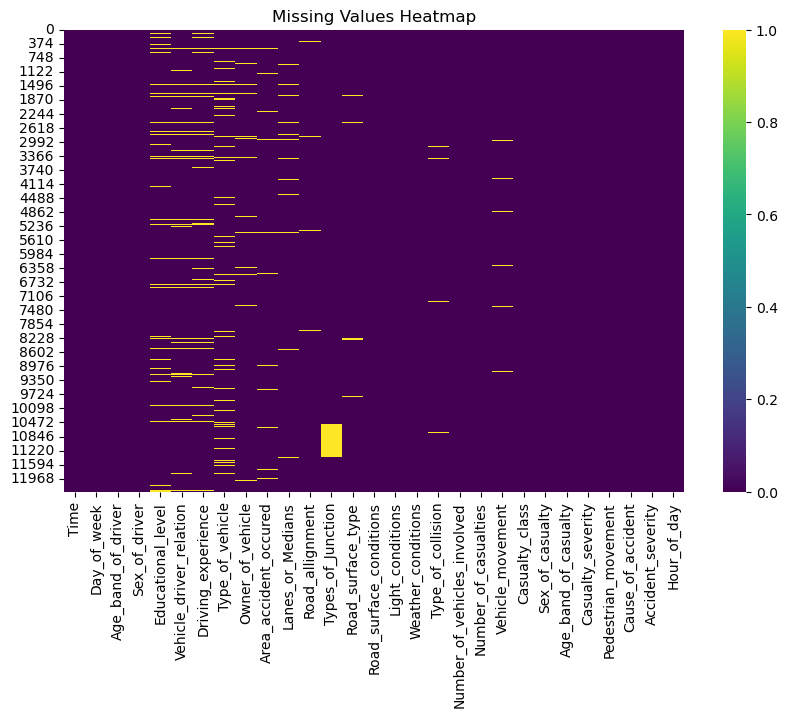

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
get_missing_value_info(dataset)

count  percentage
Educational_level          741        6.02
Vehicle_driver_relation    579        4.70
Driving_experience         829        6.73
Type_of_vehicle            950        7.71
Owner_of_vehicle           482        3.91
Area_accident_occured      239        1.94
Lanes_or_Medians           385        3.13
Road_allignment            142        1.15
Types_of_Junction          887        7.20
Road_surface_type          172        1.40
Type_of_collision          155        1.26
Vehicle_movement           308        2.50

In [14]:
# Handling missing, na, and NaN values with mode value
def handle_missing_values_with_mode(df, columns):
    """
    Imputes missing values ("na" and NaN) in specified columns of a pandas DataFrame
    with the mode, addressing potential data type issues and providing informative messages.

    Args:
        df (pd.DataFrame): The pandas DataFrame containing the data.
        columns (list): A list of column names to handle missing values in.

    Returns:
        pd.DataFrame: The DataFrame with missing values replaced with the mode or appropriate messages.

    Raises:
        ValueError: If a column is not found or the data type is not compatible with the mode calculation.
    """
    for col in columns:
        try:
            # Check for string data type
            if pd.api.types.is_string_dtype(df[col]):
                # Count occurrences of each unique value
                value_counts = df[col].value_counts()
                # Get the most frequent value (mode)
                mode_value = value_counts.idxmax()
                # Replace "na" and "NaN" with the mode
                df[col] = df[col].replace(["na", np.nan], mode_value)
            else:
                mode_value = df[col].mode()[0]

            df[col].fillna(mode_value, inplace=True)

        except KeyError:
            print(f"Column '{col}' not found in the DataFrame.")
        except ValueError as e:
            print(f"Error handling missing values in column '{col}': {e}")
    return df


In [15]:
def replace_multiple_values(data, replacements):
  """Replaces multiple values with specified replacements in a DataFrame or Series.

  Args:
    data: The DataFrame or Series to replace values in.
    replacements: A dictionary where keys are values to replace and values are their replacements.

  Returns:
    The DataFrame or Series with values replaced.
  """

  if isinstance(data, pd.Series):
    return data.replace(replacements, inplace=False)  # Avoid modifying original Series
  else:
    def replace_values_in_column(column):
      return column.replace(replacements, inplace=False)  # Avoid modifying original DataFrame

    return data.apply(replace_values_in_column)

###### Option 1 - Filling Missing Value with Mode

In [16]:
# missing_value_columns = get_missing_value_info(dataset)[get_missing_value_info(dataset)['percentage']<20].index
# df = handle_missing_values_with_mode(dataset.copy(), missing_value_columns)

###### Option 2 - Filling Missing Value with Unknown

In [17]:
# Replacing null valaues with "Unknown"
def replace_null(value):
  return 'Unknown' if pd.isna(value) else value
df = dataset.applymap(replace_null)

In [18]:
# # Replacing 'na' Values with 'Unknown' as well.
df = replace_multiple_values(df, replacements={'na':'Unknown', 'unknown':'Unknown'})

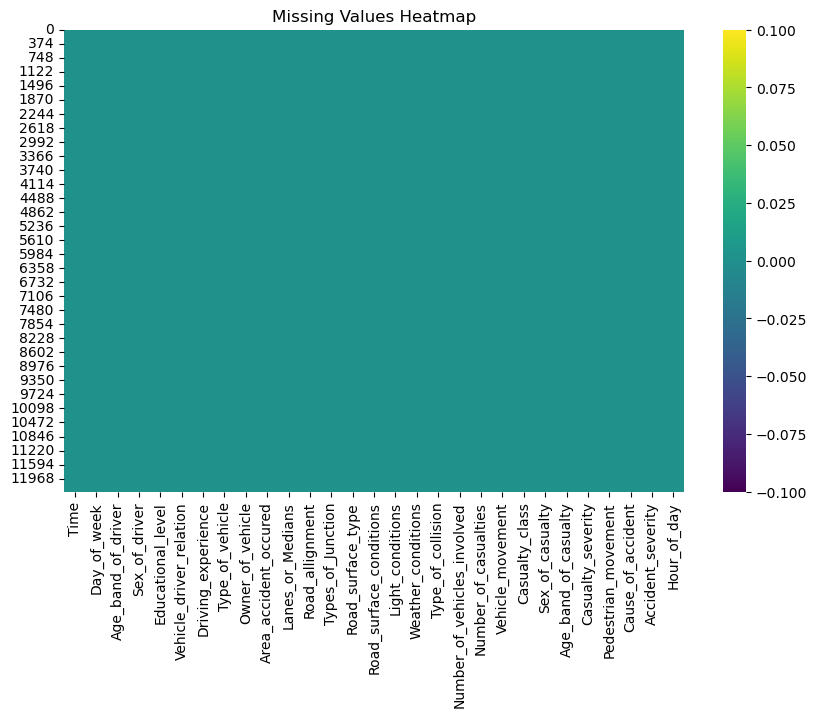

In [19]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [20]:
# Drop missing values rows
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(12316, 29)
(12316, 29)


In [21]:
missing_rows = df.isnull().sum()
missing_rows[missing_rows>0]

Series([], dtype: int64)

In [22]:
# Drop Duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)

(12316, 29)
(12316, 29)


In [23]:
def plot_numerical_distribution(feature, hue ="Accident_severity", data=df ,ticks_rotation = 0 , figsize=(5,3)):
    """
    Creates a visualization and calculates descriptive statistics for a numerical feature,
    colored by a categorical variable (hue).
    
    Args:
    feature (str): Name of the numerical feature to plot.
    hue (str): Name of the categorical variable for coloring.
    data (pd.DataFrame): DataFrame containing the data.
    """  
    # Descriptive statistics
    descriptive_stats = data.groupby(hue)[feature].describe(percentiles=[0.25, 0.5, 0.75])
    print(f"Descriptive Statistics for {feature} by {hue}:\n{descriptive_stats}")
    
    # Create histogram with hue
    plt.subplots(figsize=figsize)
    sns.histplot(data=data, x=feature, hue=hue, kde=True)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Distribution of {feature} by {hue}")
    plt.xticks(rotation = ticks_rotation)
    plt.show()

In [24]:
def plot_category_distribution(feature, hue = "Accident_severity", data=df, ticks_rotation = 0, figsize=(8,5)):
    """
    Creates a custom bar plot using matplotlib to visualize the distribution of categories
    in a feature, colored by a target variable (hue), with categories on the y-axis.

    Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
    """
    # Get the number of occurrences for each category
    n_category = dataset[feature].value_counts()

    # Create a colormap (adjust the colormap name as desired)
    import matplotlib.cm as cm
    cmap = cm.tab10  # Choose a colormap from matplotlib.cm

    # Create the bar chart
    fig, ax = plt.subplots(figsize=figsize)
    plt.barh(n_category.index, n_category.values, color=cmap(range(len(n_category))))  
    plt.xlabel("Number of occurrences")
    plt.ylabel("Category")
    plt.title(f"Distribution of category [ {feature} ]")
    plt.xticks(rotation = ticks_rotation)
    plt.gca().invert_yaxis()  # Invert y-axis for horizontal display
    plt.show()

def plot_category_counts(feature, hue = "Accident_severity", data=df, ticks_rotation = 0 , figsize=(5,3), counts = False):
    """
    Creates a count plot using seaborn to visualize the distribution of categories in a feature,
    colored by a target variable (hue).

    Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
    """
    if counts == True:
        display(data[feature].value_counts())
    else:
        print("Note: Please pass count paramaeter as 'counts = True' if you want count deatil.")
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=feature, hue=hue, data=data)
    plt.xlabel(feature)
    plt.xticks(rotation = ticks_rotation)  
    plt.ylabel("Count")
    plt.title(f"Counts of Categories in [ {feature} ] by {hue}")
    plt.show()

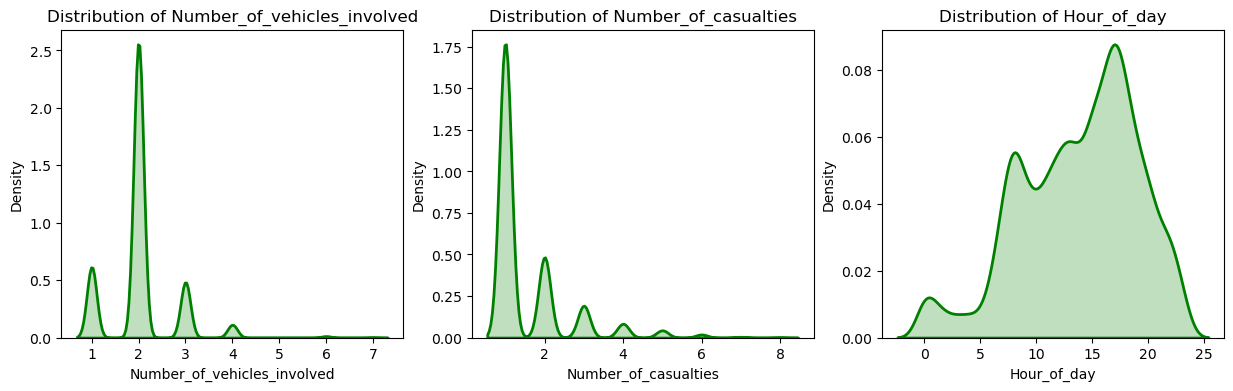

In [25]:
num_features = list(df.select_dtypes(include=['int64','float64']).columns)
num_features
# Set the figure size
plt.figure(figsize=(15, 4))  # Adjust as needed
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_features) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3
# Create subplots with KDE plots
for i, num in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    # sns.kdeplot(df_original[num], fill=True, color='skyblue', linewidth=2)
    sns.kdeplot(df[num], fill=True, color='green', linewidth=2)
    plt.title(f'Distribution of {num}')
    plt.xlabel(num)
    plt.ylabel('Density')

# plt.tight_layout()
plt.show()

Descriptive Statistics for Time by Accident_severity:
                   count unique       top freq
Accident_severity                             
Fatal injury         158     63  21:15:00   12
Serious Injury      1743    496  22:05:00   19
Slight Injury      10415   1009  15:30:00  106


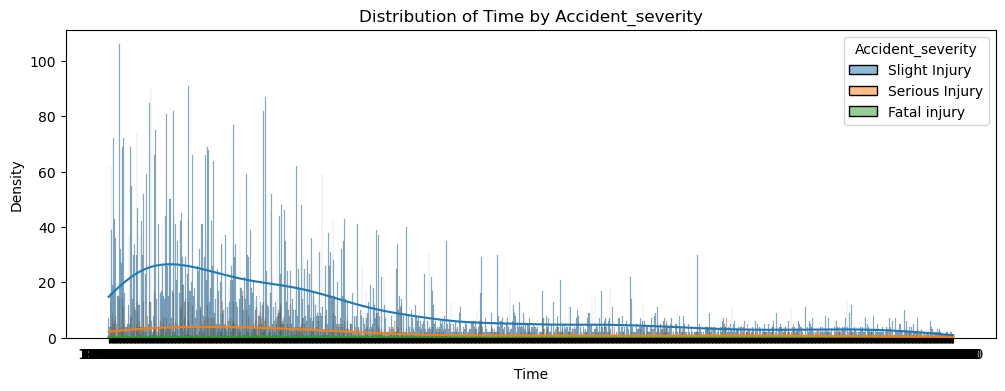

In [26]:
plot_numerical_distribution(feature="Time" , ticks_rotation=0 , figsize=(12,4))

Descriptive Statistics for Hour_of_day by Accident_severity:
                     count       mean       std  min   25%   50%   75%   max
Accident_severity                                                           
Fatal injury         158.0  14.797468  6.137241  0.0  11.0  16.0  20.0  23.0
Serious Injury      1743.0  13.931153  5.494164  0.0  10.0  15.0  18.0  23.0
Slight Injury      10415.0  13.805281  5.135976  0.0  10.0  15.0  18.0  23.0


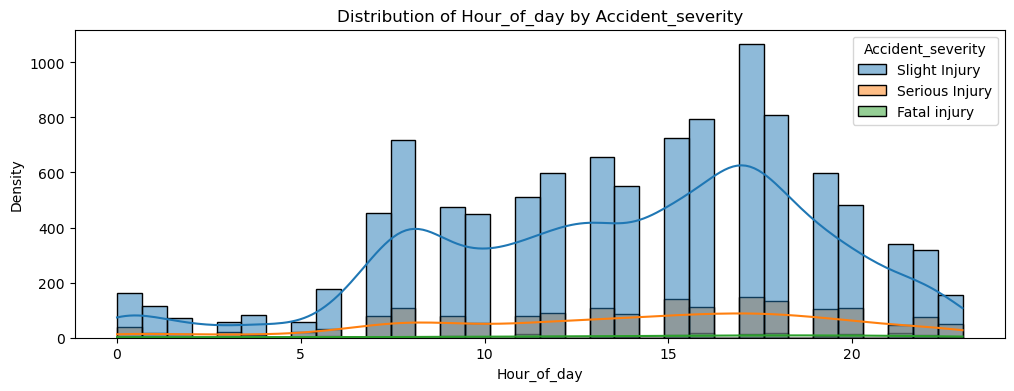

In [27]:
plot_numerical_distribution(feature="Hour_of_day" , ticks_rotation=0 , figsize=(12,4))

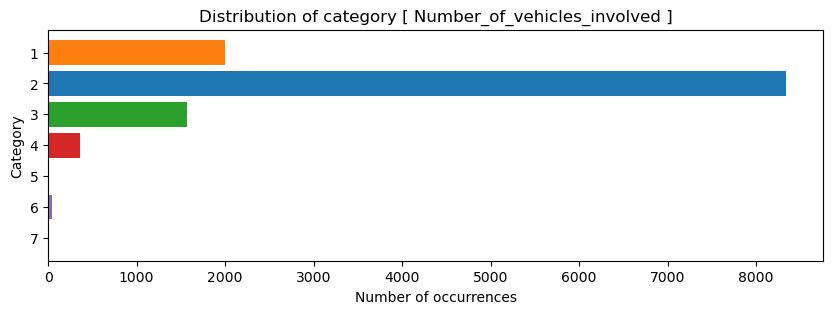

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


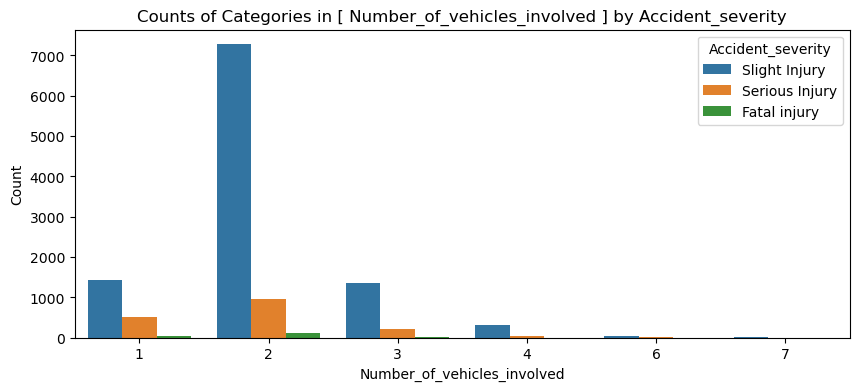

In [28]:
# plot_numerical_distribution(feature="Number_of_vehicles_involved" , ticks_rotation=0 , figsize=(10,4))
plot_category_distribution(feature="Number_of_vehicles_involved" , figsize=(10,3))
plot_category_counts(feature="Number_of_vehicles_involved", ticks_rotation=0 , figsize=(10,4))

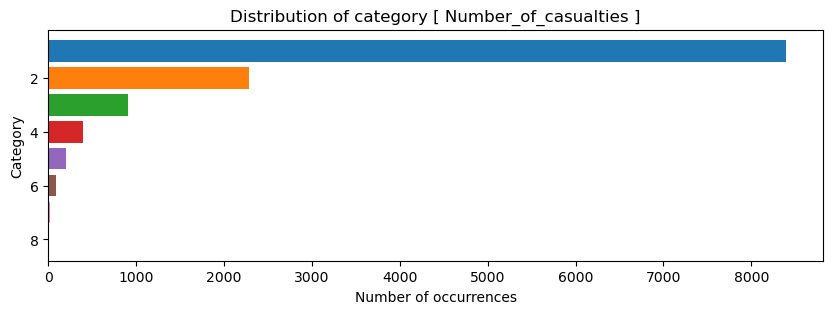

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


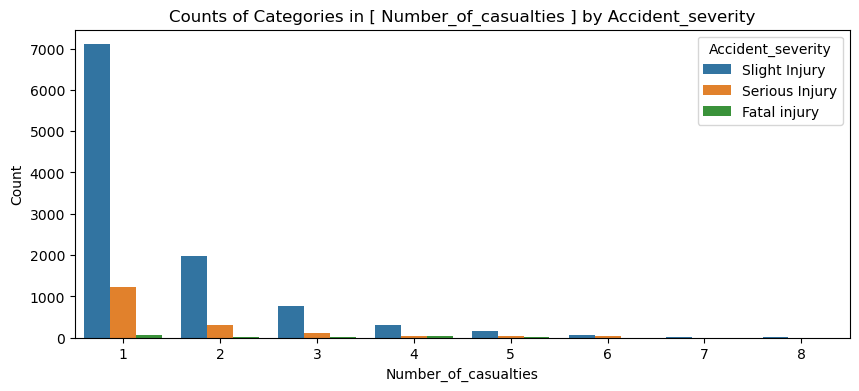

In [29]:
# plot_numerical_distribution(feature="Number_of_casualties" , ticks_rotation=0 , figsize=(10,4))
plot_category_distribution(feature="Number_of_casualties" , figsize=(10,3))
plot_category_counts(feature="Number_of_casualties", ticks_rotation=0 , figsize=(10,4))

In [30]:
print(categorical_features)
# df.columns

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


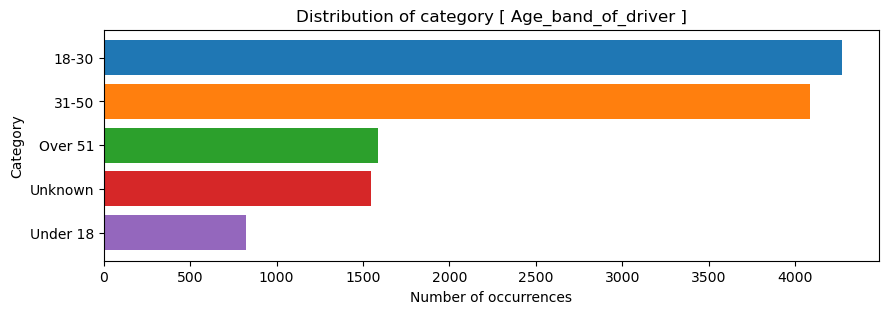

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


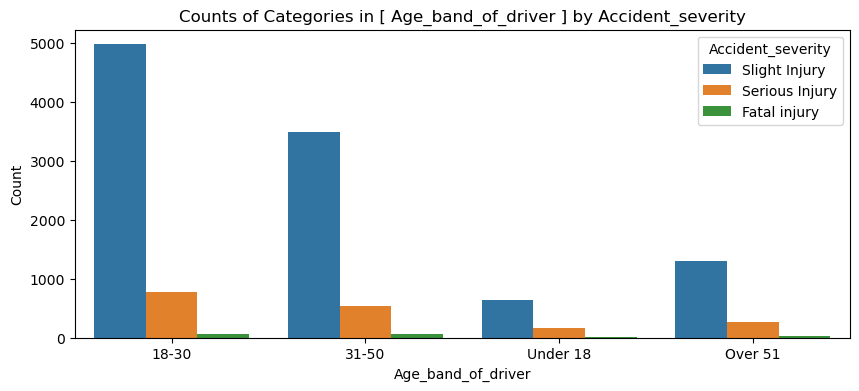

In [31]:
df["Age_band_of_driver"] = df["Age_band_of_driver"].replace("Unknown", "18-30")
plot_category_distribution(feature="Age_band_of_driver" , figsize=(10,3))
plot_category_counts(feature="Age_band_of_driver", ticks_rotation=0 , figsize=(10,4))

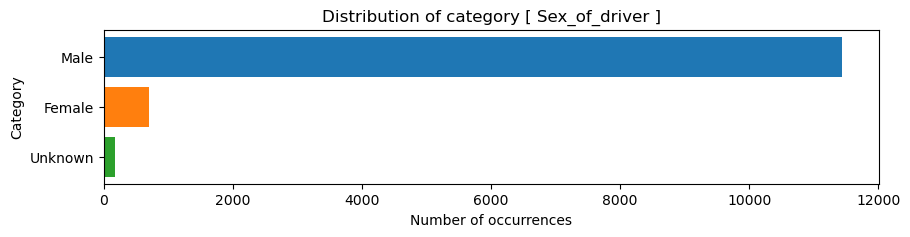

Sex_of_driver
Male      11615
Female      701
Name: count, dtype: int64

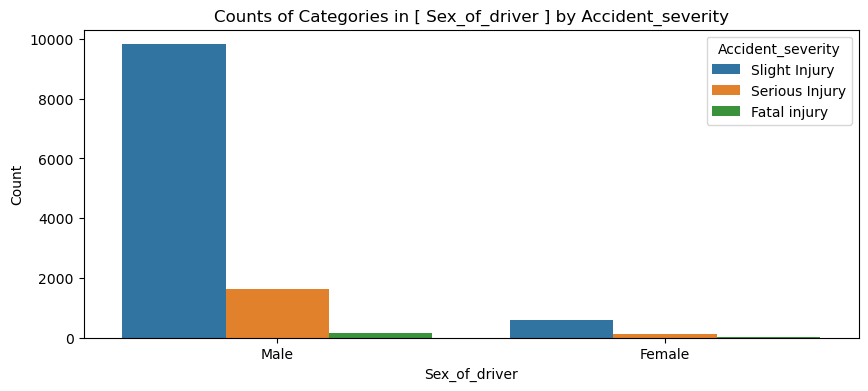

In [32]:
df["Sex_of_driver"] = df["Sex_of_driver"].replace("Unknown", "Male")
plot_category_distribution(feature="Sex_of_driver" , figsize=(10,2))
plot_category_counts(feature="Sex_of_driver", ticks_rotation=0 , figsize=(10,4), counts=True)

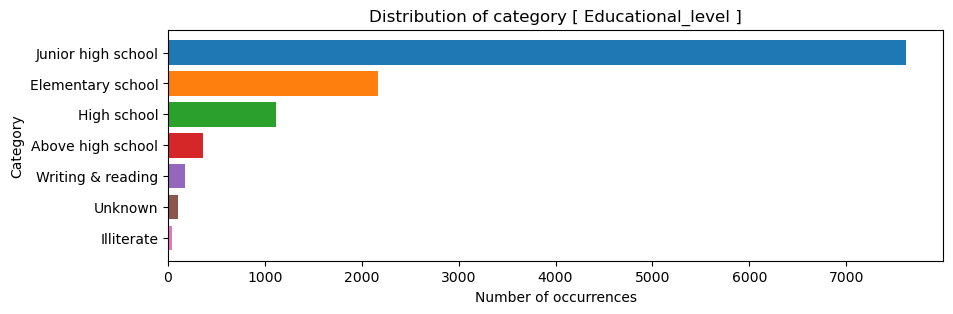

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


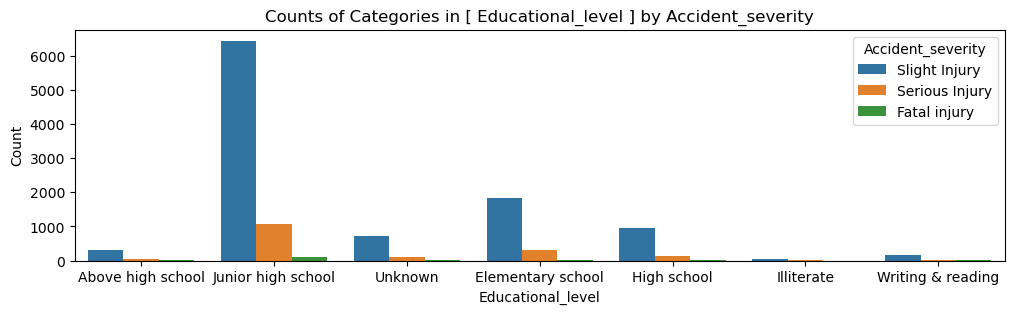

In [33]:
plot_category_distribution(feature="Educational_level" , figsize=(10,3))
plot_category_counts(feature="Educational_level", ticks_rotation=0 , figsize=(12,3), counts=False)

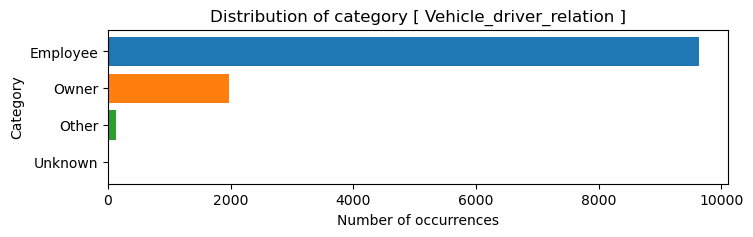

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


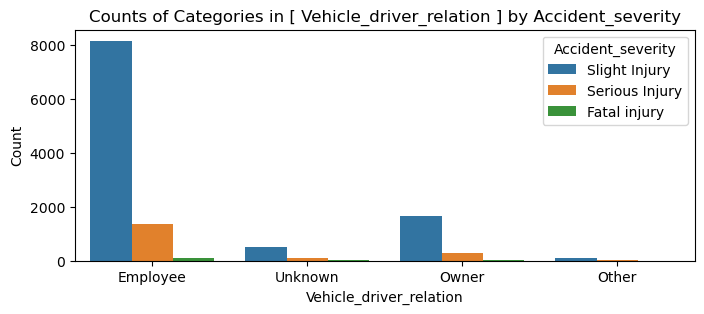

In [34]:
plot_category_distribution(feature="Vehicle_driver_relation" , figsize=(8,2))
plot_category_counts(feature="Vehicle_driver_relation", ticks_rotation=0 , figsize=(8,3), counts=False)

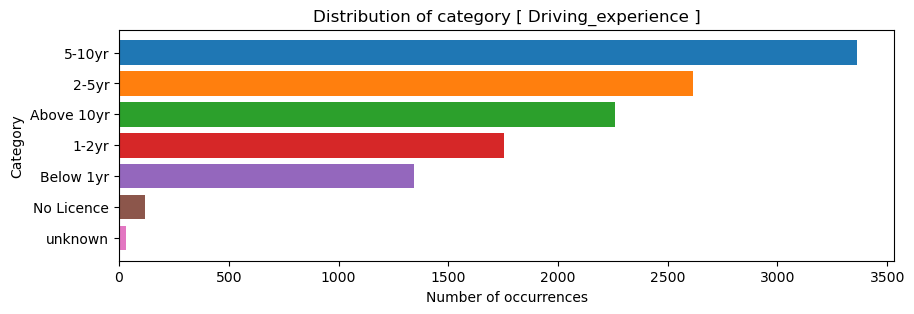

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


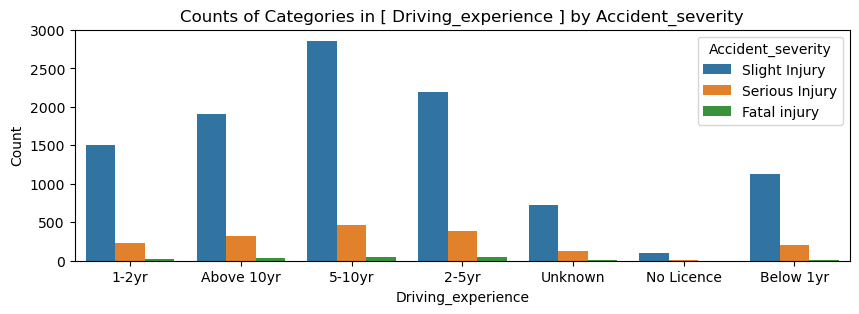

In [35]:
plot_category_distribution(feature="Driving_experience" , figsize=(10,3))
plot_category_counts(feature="Driving_experience", ticks_rotation=0 , figsize=(10,3), counts=False)

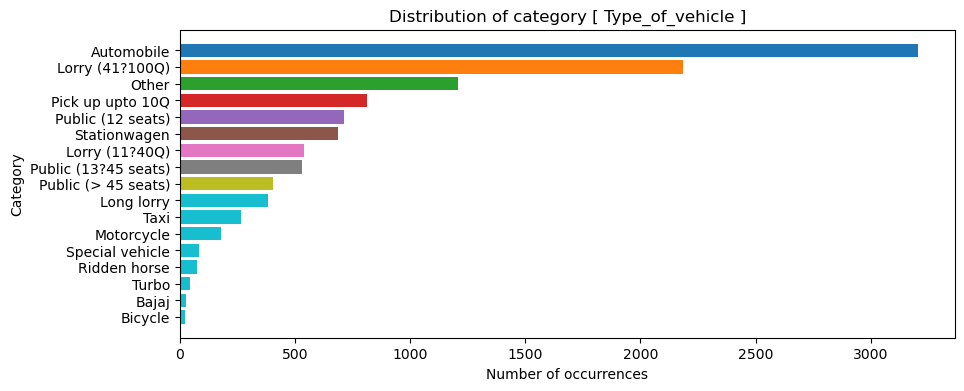

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


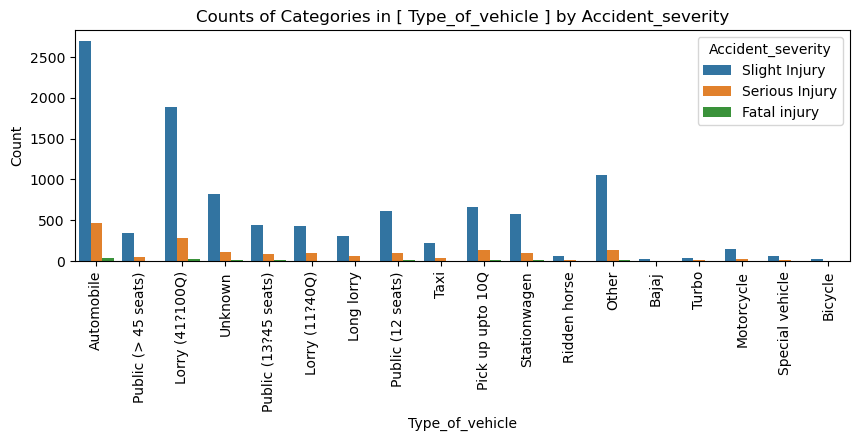

In [36]:
plot_category_distribution(feature="Type_of_vehicle" , figsize=(10,4))
plot_category_counts(feature="Type_of_vehicle", ticks_rotation=90 , figsize=(10,3))

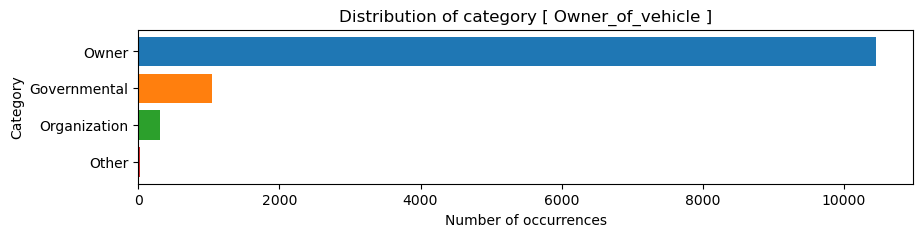

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


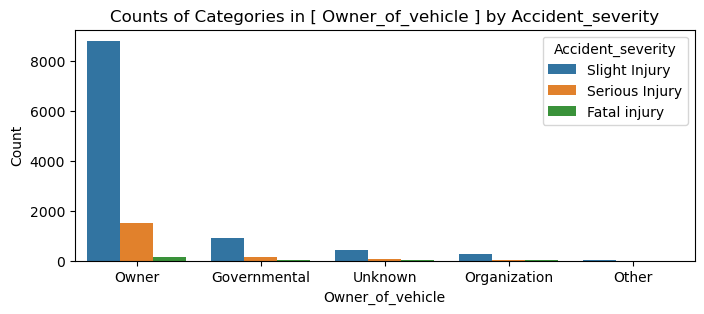

In [37]:
plot_category_distribution(feature="Owner_of_vehicle" , figsize=(10,2))
plot_category_counts(feature="Owner_of_vehicle", ticks_rotation=0 , figsize=(8,3),counts=False)

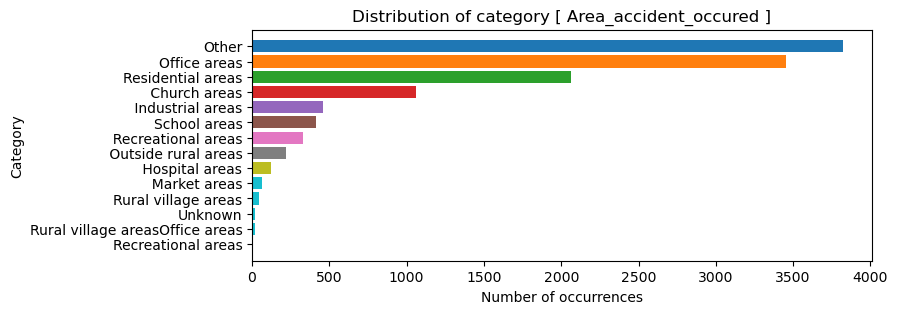

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


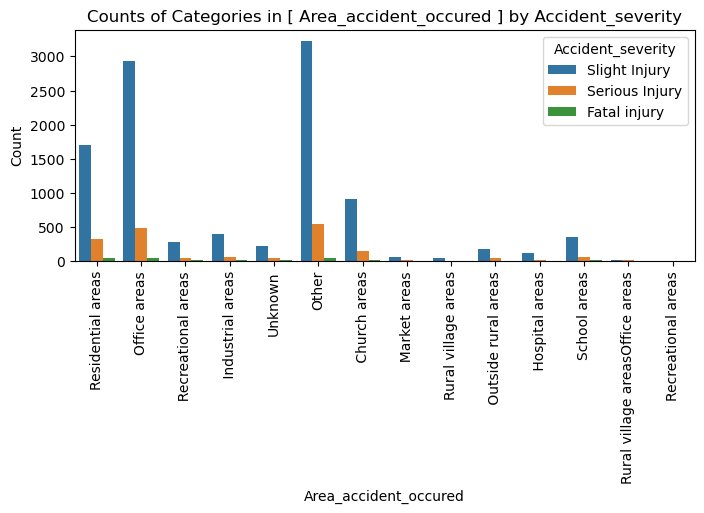

In [38]:
plot_category_distribution(feature="Area_accident_occured" , figsize=(8,3))
plot_category_counts(feature="Area_accident_occured", ticks_rotation=90 , figsize=(8,3))

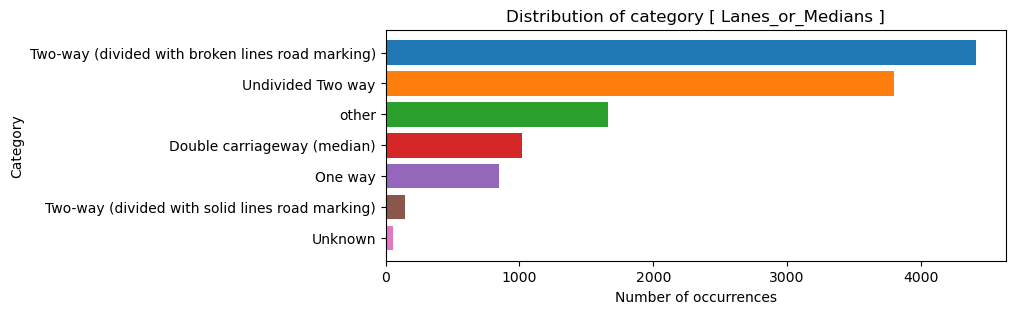

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


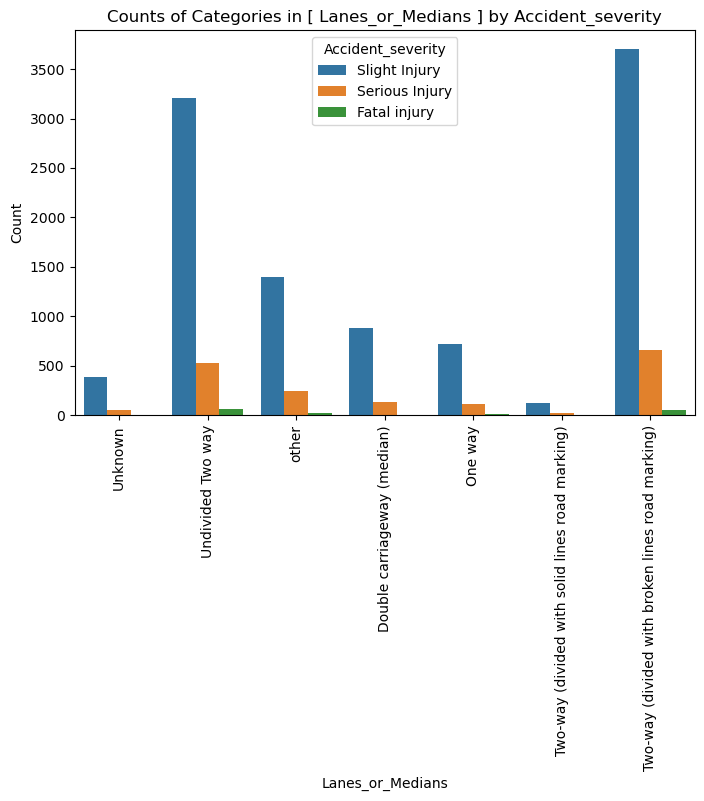

In [39]:
plot_category_distribution(feature="Lanes_or_Medians" , figsize=(8,3))
plot_category_counts(feature="Lanes_or_Medians", ticks_rotation=90 , figsize=(8,5))

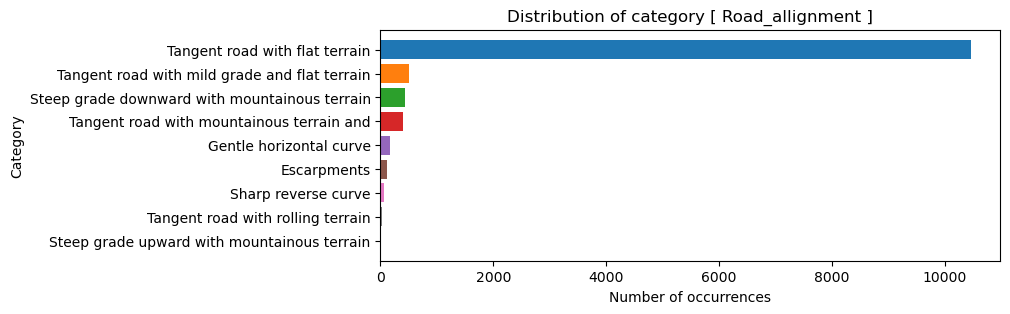

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


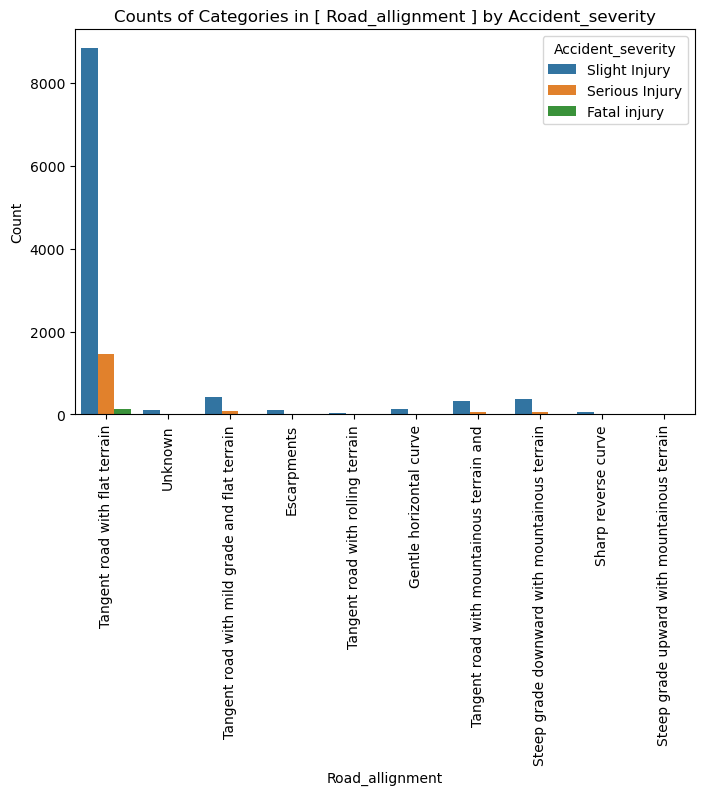

In [40]:
plot_category_distribution(feature="Road_allignment" , figsize=(8,3))
plot_category_counts(feature="Road_allignment", ticks_rotation=90 , figsize=(8,5))

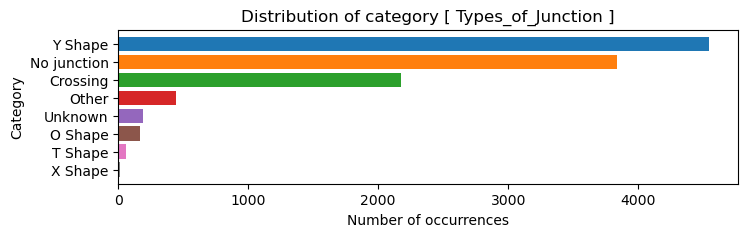

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


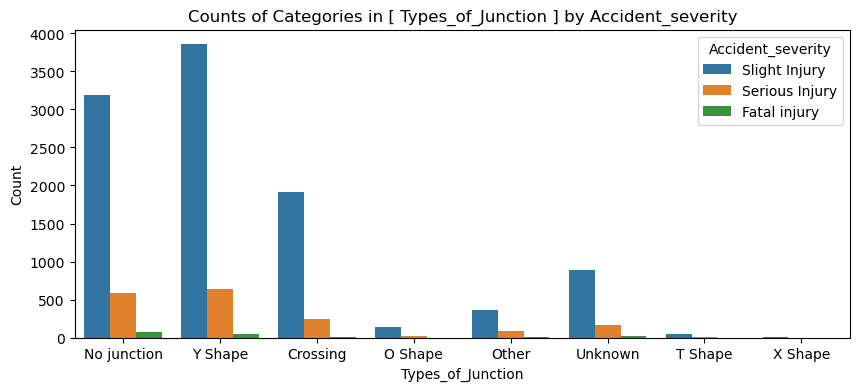

In [41]:
plot_category_distribution(feature="Types_of_Junction" , figsize=(8,2))
plot_category_counts(feature="Types_of_Junction", ticks_rotation=0 , figsize=(10,4))

In [42]:
print(categorical_features)

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


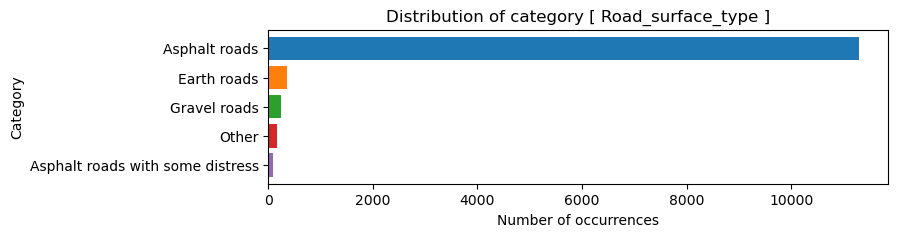

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


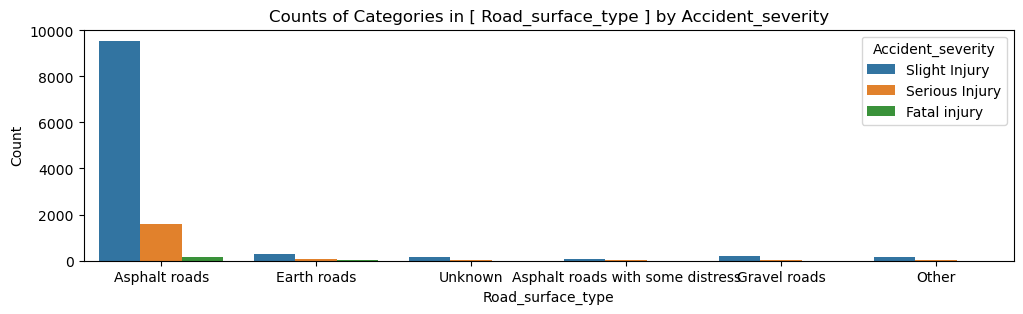

In [43]:
plot_category_distribution(feature="Road_surface_type" , figsize=(8,2))
plot_category_counts(feature="Road_surface_type", ticks_rotation=0 , figsize=(12,3),counts=False)

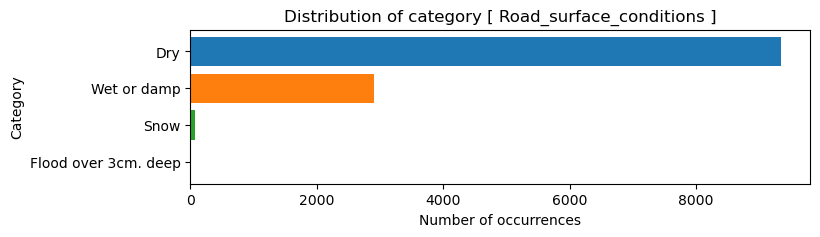

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


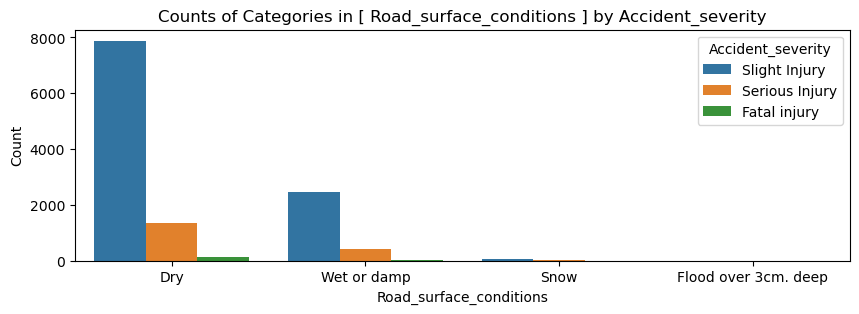

In [44]:
plot_category_distribution(feature="Road_surface_conditions" , figsize=(8,2))
plot_category_counts(feature="Road_surface_conditions", ticks_rotation=0 , figsize=(10,3),counts=False)

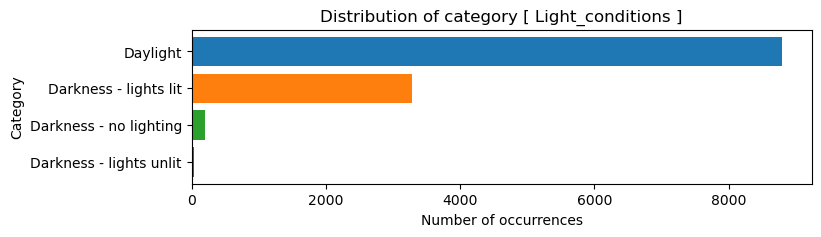

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


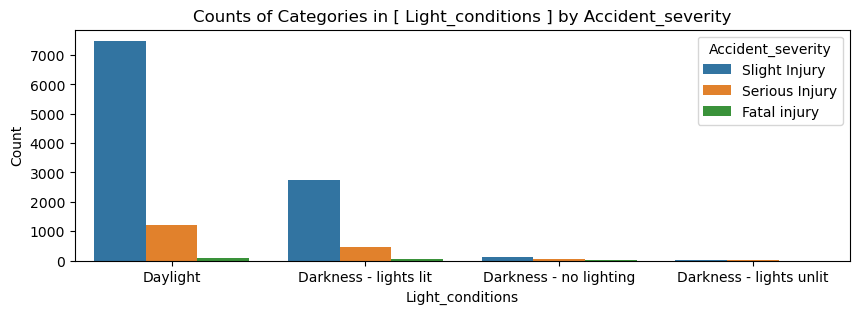

In [45]:
plot_category_distribution(feature="Light_conditions" , figsize=(8,2))
plot_category_counts(feature="Light_conditions", ticks_rotation=0 , figsize=(10,3),counts=False)

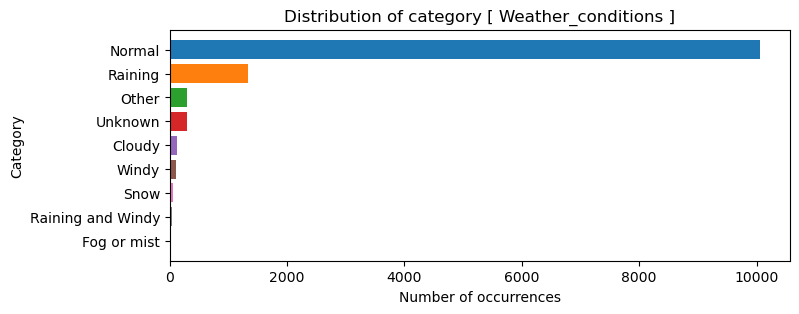

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


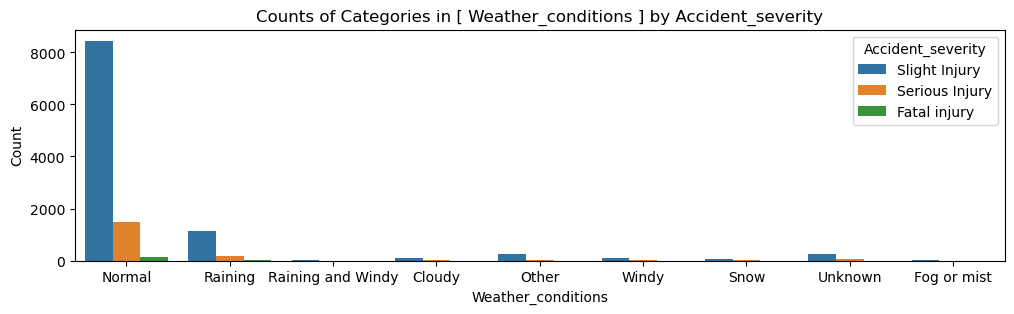

In [46]:
plot_category_distribution(feature="Weather_conditions" , figsize=(8,3))
plot_category_counts(feature="Weather_conditions", ticks_rotation=0 , figsize=(12,3),counts=False)

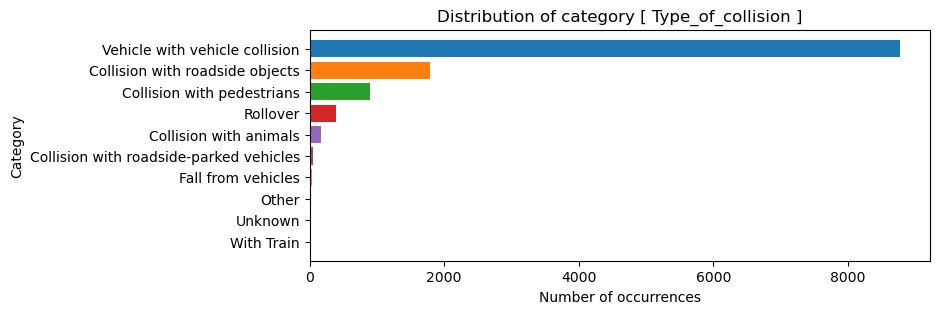

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


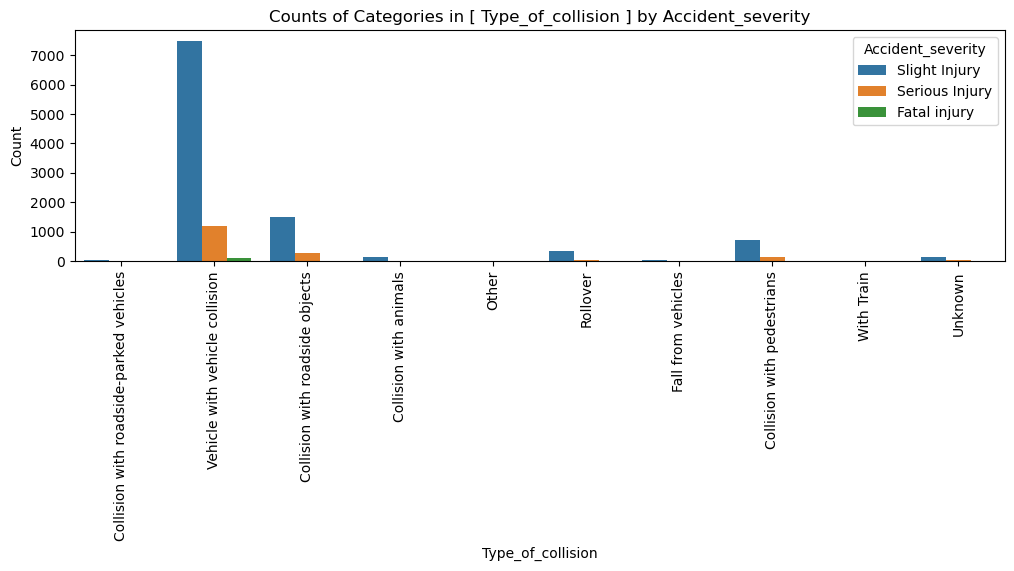

In [47]:
plot_category_distribution(feature="Type_of_collision" , figsize=(8,3))
plot_category_counts(feature="Type_of_collision", ticks_rotation=90 , figsize=(12,3),counts=False)

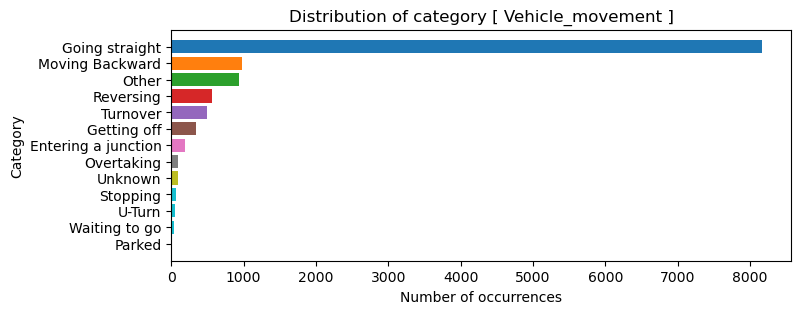

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


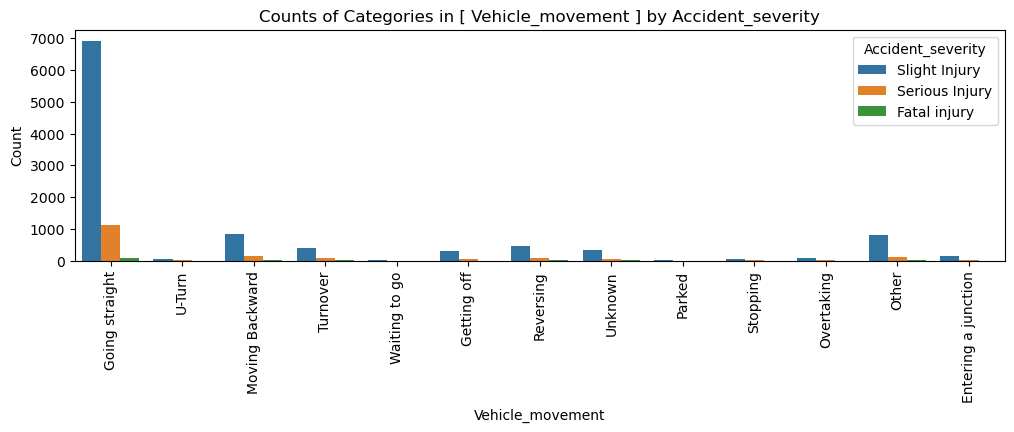

In [48]:
plot_category_distribution(feature="Vehicle_movement" , figsize=(8,3))
plot_category_counts(feature="Vehicle_movement", ticks_rotation=90 , figsize=(12,3),counts=False)

Casualty_class
Driver or rider    4944
Unknown            4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

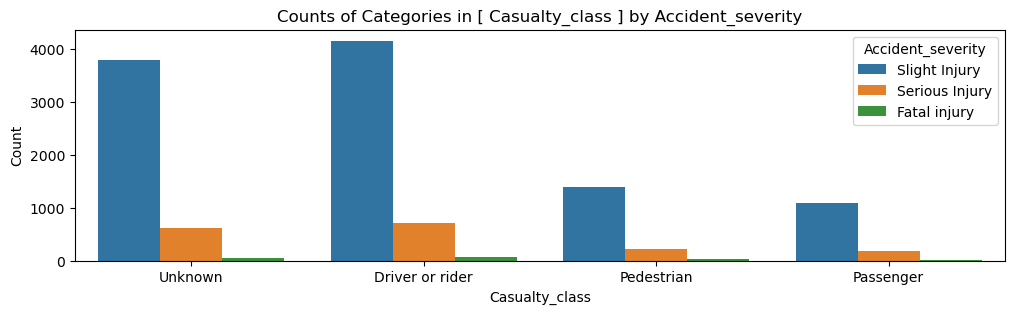

In [49]:
plot_category_counts(feature="Casualty_class", ticks_rotation=0 , figsize=(12,3),counts=True)

Sex_of_casualty
Male       5253
Unknown    4443
Female     2620
Name: count, dtype: int64

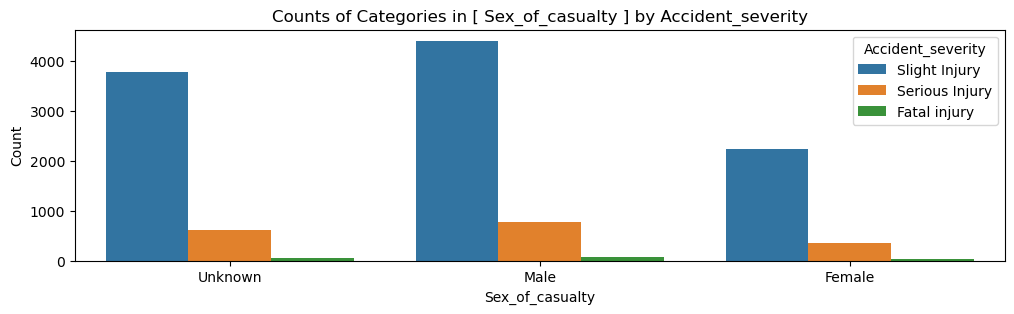

In [50]:
plot_category_counts(feature="Sex_of_casualty", ticks_rotation=0 , figsize=(12,3),counts=True)

Age_band_of_casualty
Unknown     4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

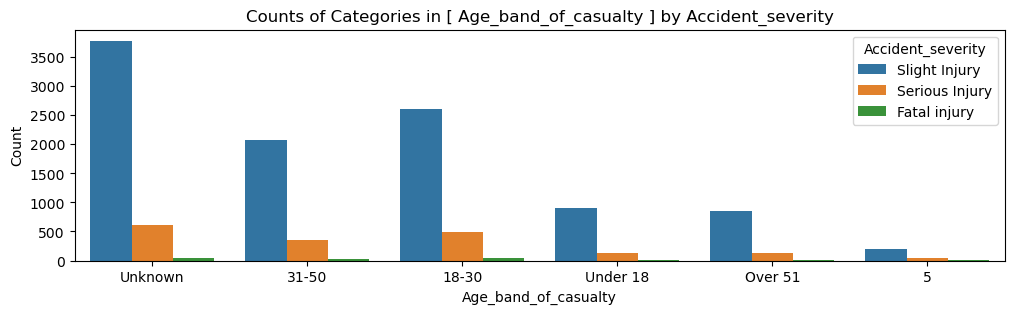

In [51]:
plot_category_counts(feature="Age_band_of_casualty", ticks_rotation=0 , figsize=(12,3),counts=True)

Casualty_severity
3          7076
Unknown    4443
2           771
1            26
Name: count, dtype: int64

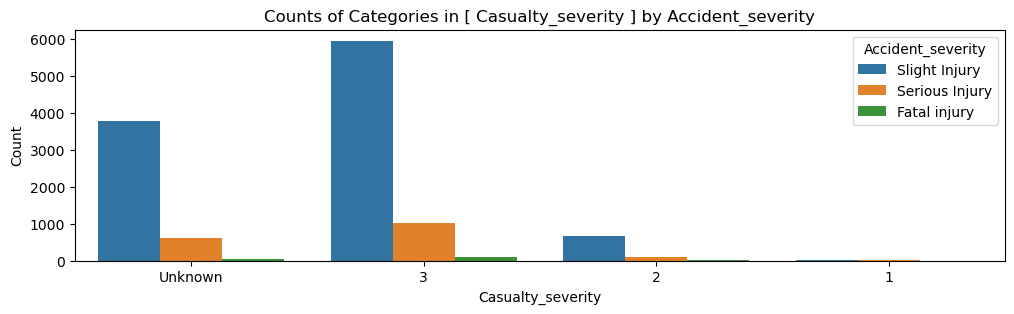

In [52]:
plot_category_counts(feature="Casualty_severity", ticks_rotation=0 , figsize=(12,3),counts=True)

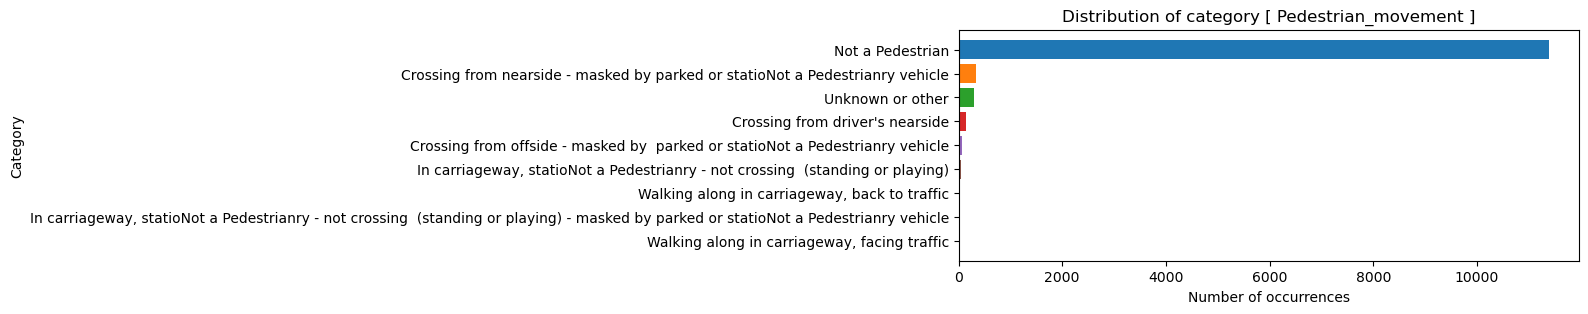

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


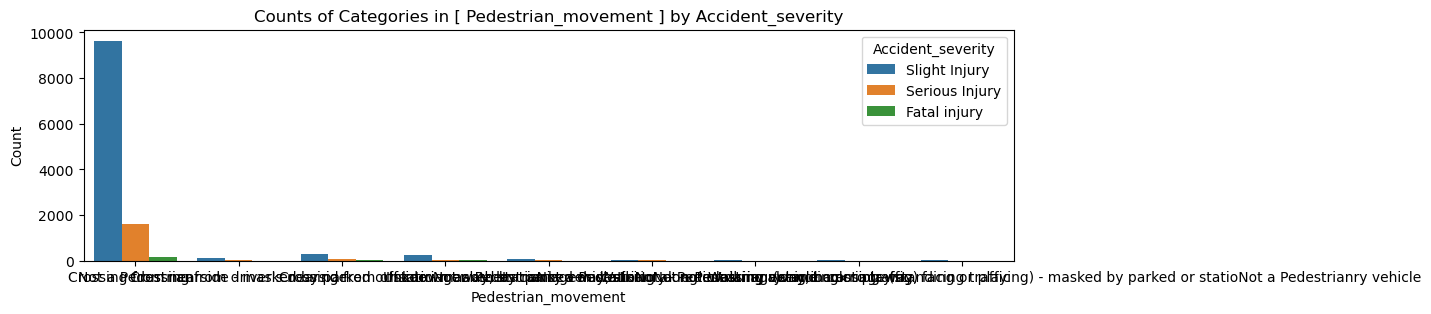

In [53]:
plot_category_distribution(feature="Pedestrian_movement" , figsize=(8,3))
plot_category_counts(feature="Pedestrian_movement", ticks_rotation=0 , figsize=(12,3),counts=False)

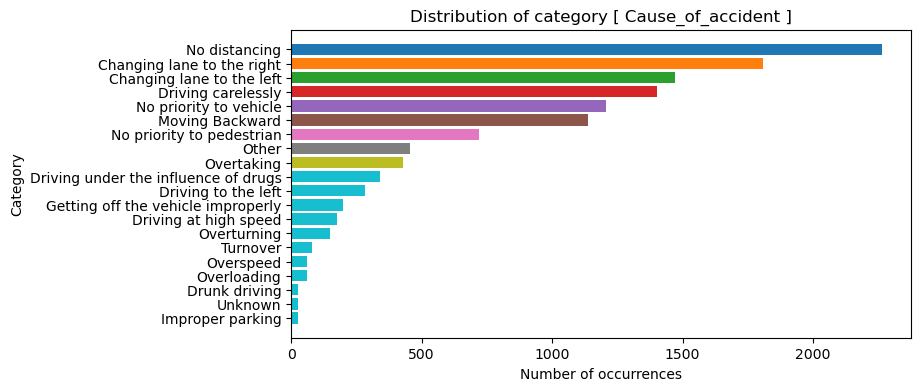

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


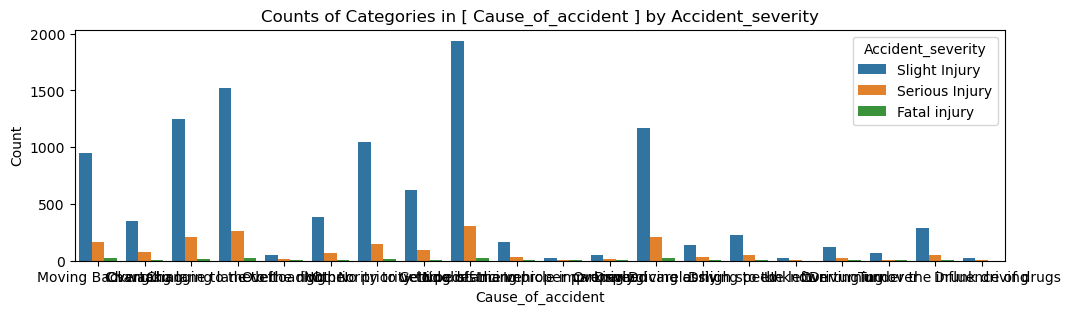

In [54]:
plot_category_distribution(feature="Cause_of_accident" , figsize=(8,4))
plot_category_counts(feature="Cause_of_accident", ticks_rotation=0 , figsize=(12,3),counts=False)

In [55]:
def visualize_feature_distribution(df, feature_x, feature_hue=None, plot_type='count' , rotation = 0):
  """
  This function creates a crosstab and countplot visualization for the distribution of a target feature
  across different categories of another feature.

  Args:
      df (pandas.DataFrame): A DataFrame containing the data.
      feature_x (str): The name of the feature to visualize on the x-axis.
      feature_hue (str, optional): The name of the feature to use for color-coding (hue) in the plot. Defaults to None (no color coding).
      plot_type (str, optional): The type of plot to generate. Currently supports 'count' (default) and 'mean'. Defaults to 'count'.

  Returns:
      None (Displays the crosstab and plot)
  """

  # Create crosstab if no hue feature is provided
  if feature_hue is None:
    print(pd.crosstab(index=df[feature_x]))
  else:
    print(pd.crosstab(index=df[feature_x], columns=df[feature_hue]))
  print("------------------------------------------------------------------------------------------------------------------------------------------------")

  # Create plot using Seaborn FacetGrid
  grid = sns.FacetGrid(data=df, col=feature_hue if feature_hue else None, height=4, aspect=1)
  if plot_type == 'count':
    grid.map(sns.countplot, feature_x, palette=['black', 'brown', 'orange'])
  elif plot_type == 'mean':
    grid.map(sns.barplot, feature_x, 'y', palette=['black', 'brown', 'orange'])  # Assuming a numeric target variable for mean
  else:
    raise ValueError(f"Unsupported plot type: {plot_type}")
# Rotate x-axis labels to prevent overlapping
  plt.xticks(rotation=rotation)  # Adjust rotation angle as needed ,ha='right'
  plt.show()

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Casualty_class                                                
Driver or rider              71             719           4154
Passenger                    12             182           1086
Pedestrian                   27             228           1394
Unknown                      48             614           3781
------------------------------------------------------------------------------------------------------------------------------------------------


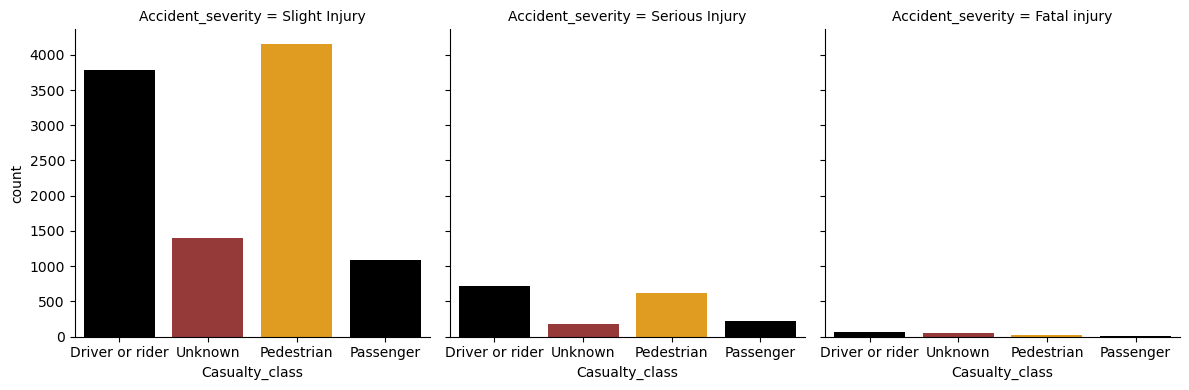

In [56]:
visualize_feature_distribution(df=df, feature_x='Casualty_class', feature_hue='Accident_severity', rotation=0)

Driving_experience  1-2yr  2-5yr  5-10yr  Above 10yr  Below 1yr  No Licence  \
Accident_severity                                                             
Fatal injury           21     46      41          29          7           0   
Serious Injury        228    381     462         323        207          13   
Slight Injury        1507   2186    2860        1910       1128         105   

Driving_experience  Unknown  
Accident_severity            
Fatal injury             14  
Serious Injury          129  
Slight Injury           719  
------------------------------------------------------------------------------------------------------------------------------------------------


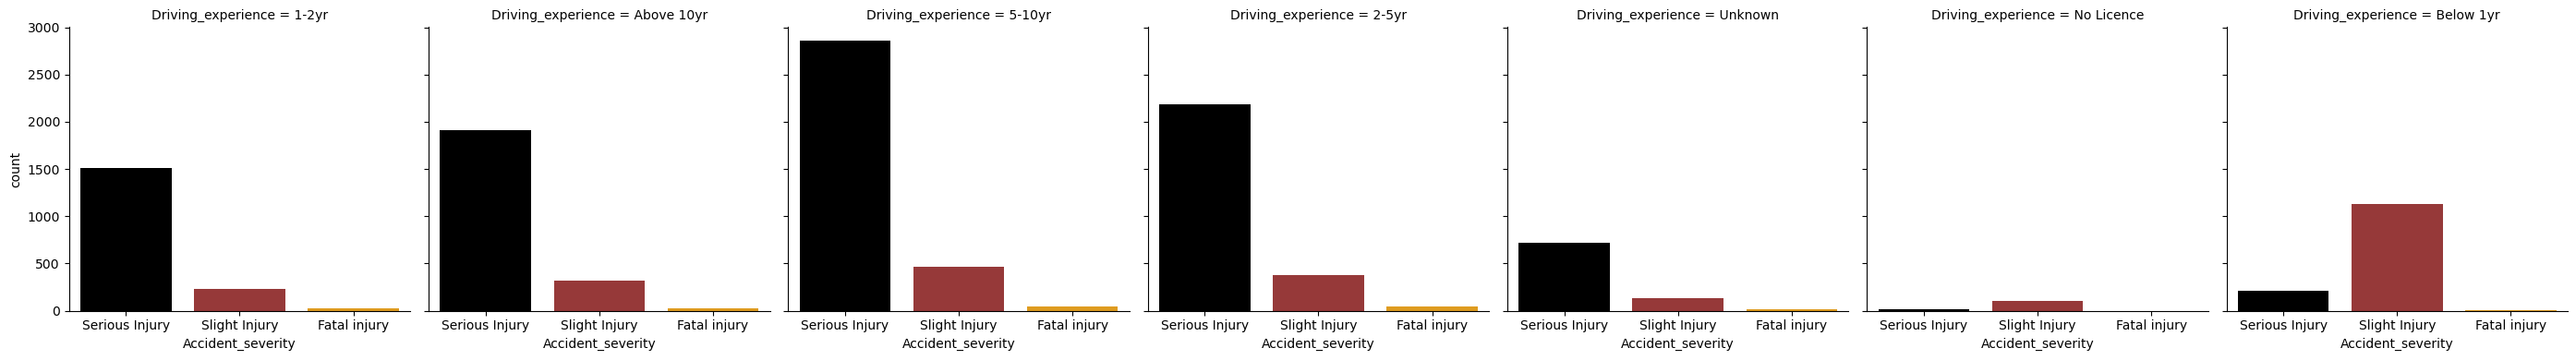

In [57]:
visualize_feature_distribution(df=df, feature_x='Accident_severity', feature_hue='Driving_experience', rotation=0) 

Accident_severity     Fatal injury  Serious Injury  Slight Injury
Age_band_of_casualty                                             
18-30                           51             487           2607
31-50                           27             349           2079
5                                3              44            197
Over 51                         16             123            855
Under 18                        13             126            896
Unknown                         48             614           3781
------------------------------------------------------------------------------------------------------------------------------------------------


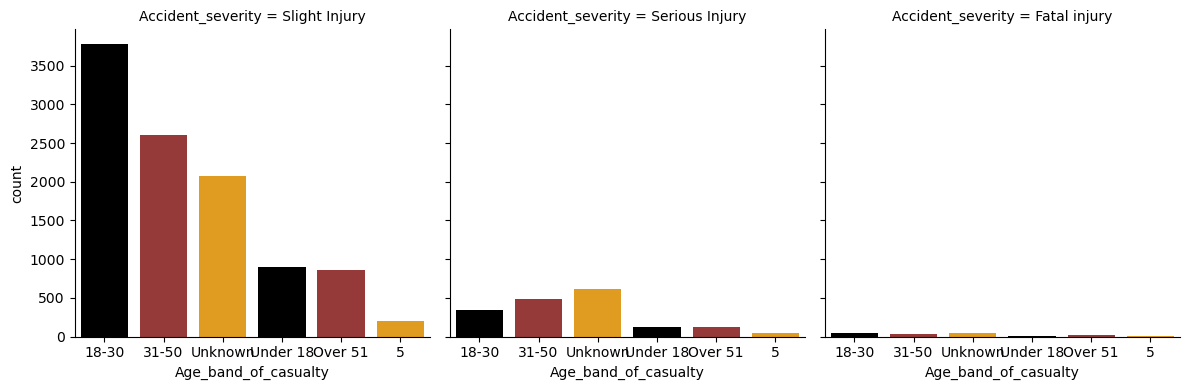

In [58]:
visualize_feature_distribution(df=df, feature_x='Age_band_of_casualty', feature_hue='Accident_severity') 

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Hour_of_day                                                   
0                             5              38            163
1                             4              17            113
2                             1              13             70
3                             6              22             56
4                             1               9             81
5                             0              20             56
6                             4              32            178
7                             1              77            454
8                             2             108            718
9                             6              78            475
10                            0              52            448
11                           12              80            511
12                            5              88            598
13                            7             108        

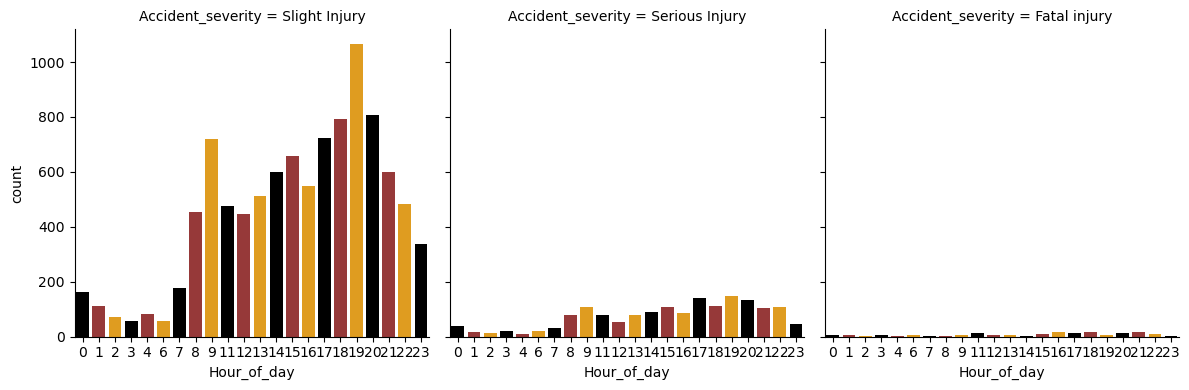

In [59]:
visualize_feature_distribution(df=df, feature_x='Hour_of_day', feature_hue='Accident_severity') 

Educational_level  Above high school  Elementary school  High school  \
Accident_severity                                                      
Fatal injury                       5                 24           15   
Serious Injury                    53                314          146   
Slight Injury                    304               1825          949   

Educational_level  Illiterate  Junior high school  Unknown  Writing & reading  
Accident_severity                                                              
Fatal injury                0                  97       14                  3  
Serious Injury              6                1083      119                 22  
Slight Injury              39                6439      708                151  
------------------------------------------------------------------------------------------------------------------------------------------------


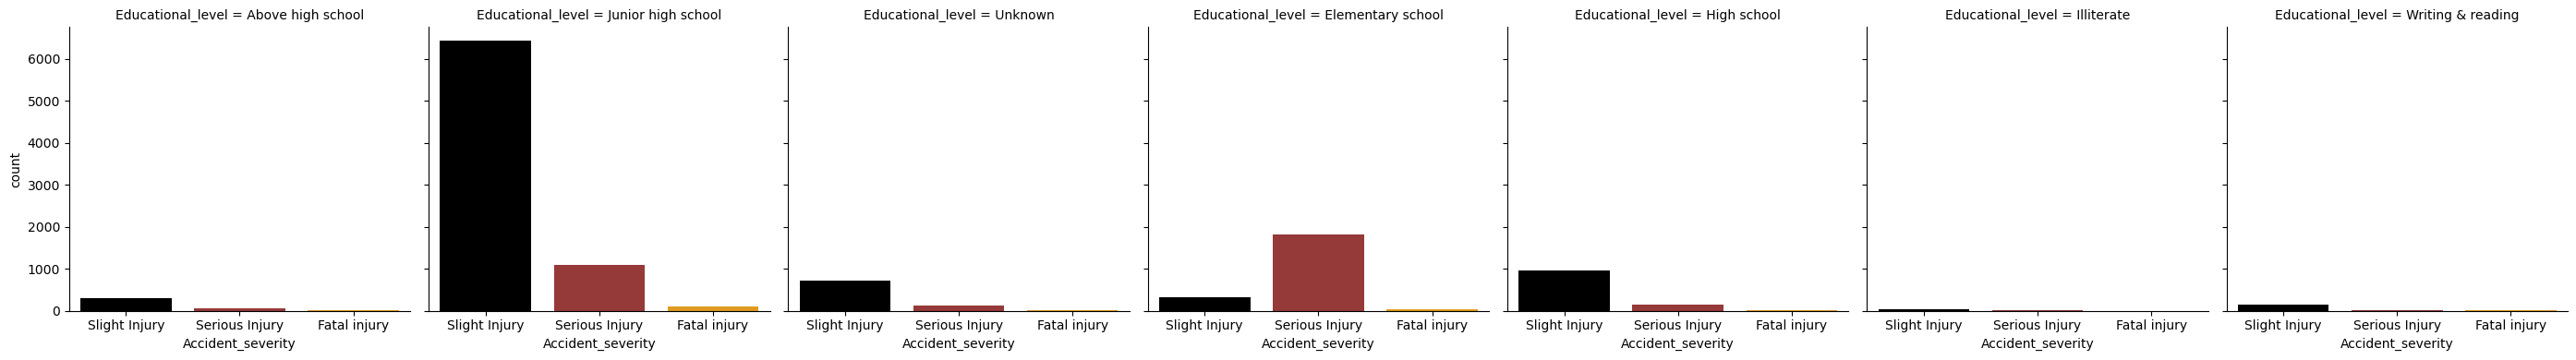

In [60]:
visualize_feature_distribution(df=df, feature_x='Accident_severity', feature_hue='Educational_level',rotation=0) 

#### Handling Multicolinearty of Training features

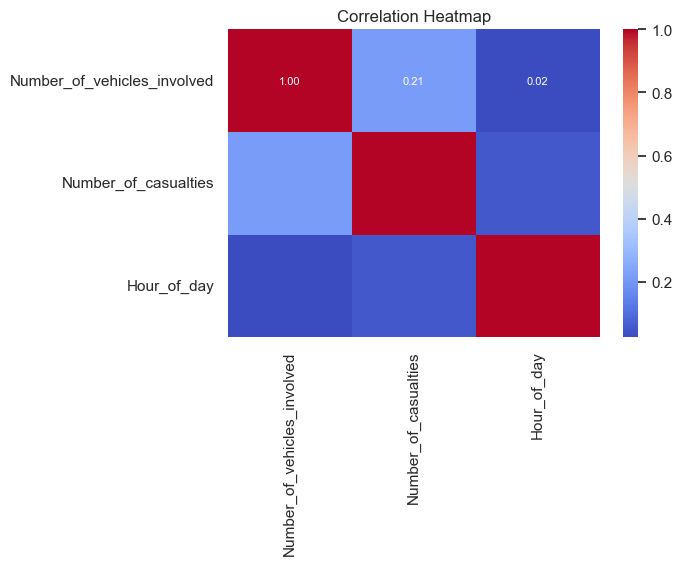

No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).


In [61]:
# Calculate correlation matrix
correlation_matrix = df[num_features].corr()
# Create a heatmap to visualize correlations
plt.figure(figsize=(6, 4))
sns.set()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'fontsize': 8})  
# Add labels and title
plt.title('Correlation Heatmap')
plt.show()
# Identify highly correlated features (VIF calculation for additional precision)
highly_correlated = [col for col in correlation_matrix.columns if any(abs(val) > 0.8 for val in correlation_matrix[col].drop(col))]
if highly_correlated:
  print("Potentially highly correlated features:", highly_correlated)
  # Consider further analysis like VIF calculation and domain knowledge before dropping features
else:
  print("No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).")

In [62]:
def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each explanatory variable.

    Args:
        X (pd.DataFrame): Design matrix with explanatory variables.

    Returns:
        pd.DataFrame: DataFrame with VIF values and corresponding feature names.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["Features"] = df.columns
    return vif
vif_df = calculate_vif(df[num_features])
print(vif_df)
print("Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.")

   VIF Factor                     Features
0    5.999953  Number_of_vehicles_involved
1    3.398721         Number_of_casualties
2    5.023532                  Hour_of_day
Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.


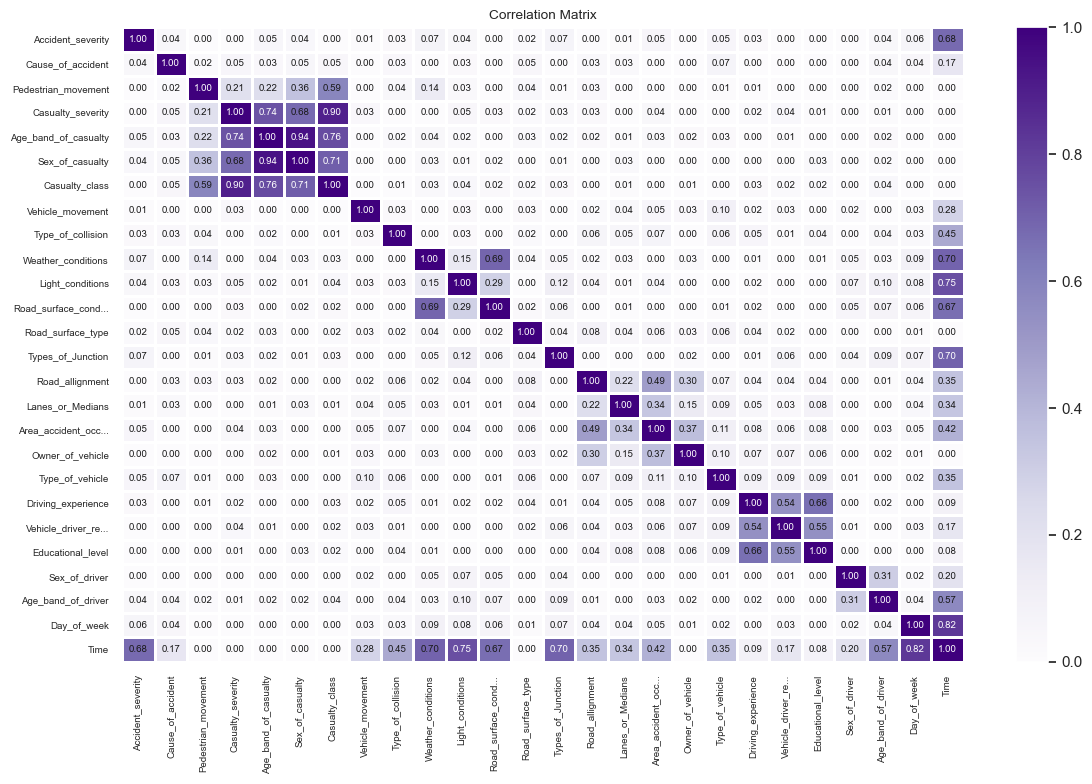

In [63]:
import phik
# cat= [col for col in df.columns if col =="object"]
corr_matrix = df[[feature for feature in df.columns if df[feature].dtypes == 'object']].phik_matrix()
plot_correlation_matrix(corr_matrix.values,
                       x_labels= corr_matrix.columns,
                       y_labels= corr_matrix.index,
                       vmin=0,
                       vmax=1,
                       color_map="Purples",
                       title= "Correlation Matrix",
                       fontsize_factor= .70,
                       figsize= (12,8))

In [64]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'object']
def chi2_test(feature1, feature2, matrix):
    """
    Performs a chi-squared test on two categorical features and updates the results matrix.

    Args:
        feature1 (str): Name of the first categorical feature.
        feature2 (str): Name of the second categorical feature.
        matrix (np.ndarray): The results matrix to store chi-squared values and p-values.

    Returns:
        np.ndarray: The updated results matrix.
    """

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    try:
        chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    except ValueError as e:
        print(f"Error performing chi-squared test: {e}")
        return matrix  # Return unmodified matrix on error

    # Calculate indices inside the function for clarity and avoid potential naming conflicts
    feature1_index = categorical_features.index(feature1)  # Find index of feature1
    feature2_index = categorical_features.index(feature2)  # Find index of feature2

    matrix[feature1_index][feature2_index] = chi2
    matrix[feature1_index][feature2_index + 1] = pval

    return matrix

def analyze_multicollinearity(chi2_results, corr_threshold=0.05):
    """
    Identifies potentially high-collinear feature pairs based on a p-value threshold.

    Args:
        chi2_results (pd.DataFrame): DataFrame containing chi-squared values and p-values.
        corr_threshold (float, optional): Threshold for p-value considered high. Defaults to 0.05.

    Returns:
        list: List of potentially high-collinear feature pairs.
    """
    high_corr_features = []
    for i in range(len(categorical_features)):
        for j in range(i + 1, len(categorical_features)):
            if chi2_results.iloc[i, j + 2] < corr_threshold:  # Correct p-value index
                high_corr_features.append((categorical_features[i], categorical_features[j]))

    return high_corr_features

# Analyze pairwise relationships
chi2_results = np.zeros((len(categorical_features), len(categorical_features) * 2))  # Doubled size
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        chi2_results = chi2_test(feature1, feature2, chi2_results.copy())

# Convert matrix to DataFrame with separate columns
column_names = [f"chi2_{col}" for col in categorical_features] + [f"pval_{col}" for col in categorical_features]
chi2_results_df = pd.DataFrame(chi2_results, columns=column_names, index=categorical_features)

# Improved display formatting and handling large DataFrames
print("\nChi-Squared Test Results (Matrix):")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
display(chi2_results_df)

# Analyze potential multicollinearity
high_corr_features = analyze_multicollinearity(chi2_results_df)

# Print potentially high-collinear features
if high_corr_features:
    print("\nPotentially high-collinear feature pairs:")
    for pair in high_corr_features:
        display(f"- {pair[0]} - {pair[1]}")


Chi-Squared Test Results (Matrix):


chi2_Time  chi2_Day_of_week  chi2_Age_band_of_driver  \
Time                           0.0      21866.884155              6435.871145   
Day_of_week                    0.0          0.000000                47.922005   
Age_band_of_driver             0.0          0.000000                 0.000000   
Sex_of_driver                  0.0          0.000000                 0.000000   
Educational_level              0.0          0.000000                 0.000000   
Vehicle_driver_relation        0.0          0.000000                 0.000000   
Driving_experience             0.0          0.000000                 0.000000   
Type_of_vehicle                0.0          0.000000                 0.000000   
Owner_of_vehicle               0.0          0.000000                 0.000000   
Area_accident_occured          0.0          0.000000                 0.000000   
Lanes_or_Medians               0.0          0.000000                 0.000000   
Road_allignment                0.0          0.000000                 0.000000   
Types_of_Junction              0.0          0.000000                 0.000000   
Road_surface_type              0.0          0.000000                 0.000000   
Road_surface_conditions        0.0          0.000000                 0.000000   
Light_conditions               0.0          0.000000                 0.000000   
Weather_conditions             0.0          0.000000                 0.000000   
Type_of_collision              0.0          0.000000                 0.000000   
Vehicle_movement               0.0          0.000000                 0.000000   
Casualty_class                 0.0          0.000000                 0.000000   
Sex_of_casualty                0.0          0.000000                 0.000000   
Age_band_of_casualty           0.0          0.000000                 0.000000   
Casualty_severity              0.0          0.000000                 0.000000   
Pedestrian_movement            0.0          0.000000                 0.000000   
Cause_of_accident              0.0          0.000000                 0.000000   
Accident_severity              0.0          0.000000                 0.000000   

                         chi2_Sex_of_driver  chi2_Educational_level  \
Time                            1346.865465             6502.533033   
Day_of_week                        9.802967               34.911205   
Age_band_of_driver               522.615407               15.952900   
Sex_of_driver                      0.000000                2.972809   
Educational_level                  0.000000                0.000000   
Vehicle_driver_relation            0.000000                0.000000   
Driving_experience                 0.000000                0.000000   
Type_of_vehicle                    0.000000                0.000000   
Owner_of_vehicle                   0.000000                0.000000   
Area_accident_occured              0.000000                0.000000   
Lanes_or_Medians                   0.000000                0.000000   
Road_allignment                    0.000000                0.000000   
Types_of_Junction                  0.000000                0.000000   
Road_surface_type                  0.000000                0.000000   
Road_surface_conditions            0.000000                0.000000   
Light_conditions                   0.000000                0.000000   
Weather_conditions                 0.000000                0.000000   
Type_of_collision                  0.000000                0.000000   
Vehicle_movement                   0.000000                0.000000   
Casualty_class                     0.000000                0.000000   
Sex_of_casualty                    0.000000                0.000000   
Age_band_of_casualty               0.000000                0.000000   
Casualty_severity                  0.000000                0.000000   
Pedestrian_movement                0.000000                0.000000   
Cause_of_accident                  0.000000                0.0


Potentially high-collinear feature pairs:


'- Time - Cause_of_accident'

'- Time - Accident_severity'

'- Day_of_week - Cause_of_accident'

'- Day_of_week - Accident_severity'

'- Age_band_of_driver - Cause_of_accident'

'- Age_band_of_driver - Accident_severity'

'- Sex_of_driver - Accident_severity'

'- Educational_level - Accident_severity'

'- Vehicle_driver_relation - Accident_severity'

'- Driving_experience - Accident_severity'

'- Type_of_vehicle - Accident_severity'

'- Owner_of_vehicle - Accident_severity'

'- Area_accident_occured - Cause_of_accident'

'- Area_accident_occured - Accident_severity'

'- Lanes_or_Medians - Accident_severity'

'- Road_allignment - Accident_severity'

'- Types_of_Junction - Cause_of_accident'

'- Types_of_Junction - Accident_severity'

'- Road_surface_type - Accident_severity'

'- Road_surface_conditions - Accident_severity'

'- Light_conditions - Cause_of_accident'

'- Light_conditions - Accident_severity'

'- Weather_conditions - Cause_of_accident'

'- Weather_conditions - Accident_severity'

'- Type_of_collision - Accident_severity'

'- Vehicle_movement - Accident_severity'

'- Casualty_class - Accident_severity'

'- Sex_of_casualty - Accident_severity'

'- Age_band_of_casualty - Cause_of_accident'

'- Age_band_of_casualty - Accident_severity'

'- Casualty_severity - Accident_severity'

'- Pedestrian_movement - Accident_severity'

'- Cause_of_accident - Accident_severity'

In [65]:
print(categorical_features)
print(num_features)

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
['Number_of_vehicles_involved', 'Number_of_casualties', 'Hour_of_day']


In [66]:
# Removing features with Multicollinearity or similar info
columns = ["Time"]
          # ,"Educational_level","Casualty_class","Sex_of_casualty","Age_band_of_casualty","Pedestrian_movement",
          # "Vehicle_driver_relation","Owner_of_vehicle", "Sex_of_driver", "Road_surface_type" , "Age_band_of_driver",
          # "Type_of_vehicle",]
df.drop(columns=columns , inplace=True)

## 02_Feature Engineering
* Removing Outliers
* Normalize/scale/transform features.
* Select relevant features (variables) for modeling.
* Create new features if needed.

#### Handling Outliers

In [67]:
display(df.head(1))
skim(df)

Day_of_week Age_band_of_driver Sex_of_driver  Educational_level  \
0      Monday              18-30          Male  Above high school   

  Vehicle_driver_relation Driving_experience Type_of_vehicle Owner_of_vehicle  \
0                Employee              1-2yr      Automobile            Owner   

  Area_accident_occured Lanes_or_Medians                 Road_allignment  \
0     Residential areas          Unknown  Tangent road with flat terrain   

  Types_of_Junction Road_surface_type Road_surface_conditions  \
0       No junction     Asphalt roads                     Dry   

  Light_conditions Weather_conditions  \
0         Daylight             Normal   

                         Type_of_collision  Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                            2   

   Number_of_casualties Vehicle_movement Casualty_class Sex_of_casualty  \
0                     2   Going straight        Unknown         Unknown   

  Age_band_of_casualty Casualty_severity Pedestrian_movement  \
0              Unknown           Unknown    Not a Pedestrian   

  Cause_of_accident Accident_severity  Hour_of_day  
0   Moving Backward     Slight Injury           17

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12316  │ │ string      │ 25    │                                                          │
│ │ Number of columns │ 28     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Number_of_vehicles_involve │    0 │      0 │      2 │   0.69 │   1 │     2 │    2 │    2 │     7 │   ▂▇▂   │  │
│ │ d                          │      │        │        │        │     │       │      │      │       │         │  │
│ │ Number_of_casualties       │    0 │      0 │    1.5 │      1 │   1 │     1 │    1 │    2 │     8 │   ▇▁    │  │
│ │ Hour_of_day                │    0 │      0 │     14 │    5.2 │   0 │    10 │   15 │   18 │    23 │ ▁▂▅▆▇▃  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Day_of_week                           │     0 │         0 │                        1 │               12316 │  │
│ │ Age_band_of_driver                    │     0 │         0 │                      1.2 │               14726 │  │
│ │ Sex_of_driver                         │     0 │         0 │                        1 │               12316 │  │
│ │ Educational_level                     │     0 │         0 │                      2.6 │               31903 │  │
│ │ Vehicle_driver_relation               │     0 │         0 │                        1 │               12316 │  │
│ │ Driving_experience                    │     0 │         0 │                      1.3 │               16038 │  │
│ │ Type_of_vehicle                       │     0 │         0 │                      1.8 │               21717 │  │
│ │ Owner_of_vehicle                      │     0 │         0 │                        1 │               12316 │  │
│ │ Area_accident_occured                 │     0 │         0 │                      1.9 │               23489 │  │
│ │ Lanes_or_Medians                      │     0 │         0 │                      4.1 │               50111 │  │
│ │ Road_allignment                       │     0 │         0 │                      5.1 │               62467 │  │
│ │ Types_of_Junction                     │     0 │         0 │                      1.7 │               20932 │  │
│ │ Road_surface_type                     │     0 │         0 │                        2 │               24536 │  │
│ │ Road_surface_conditions               │     0 │     

In [68]:
def remove_outliers_by_featur(df, column_name, n_std=1.5):
    mean = df[column_name].mean()
    sd = df[column_name].std()
    lower_fence = mean - (n_std * sd)
    upper_fence = mean + (n_std * sd)
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_fence) | (df[column_name] > upper_fence)]
    print(f"Identified outliers: {len(outliers)}")
        # Remove outliers
    df.drop(outliers.index, inplace=True)

def remove_outliers_by_feature_class(df, column_name, class_column, n_std = 1.5):
    for class_value in df[class_column].unique():
        class_df = df[df[class_column] == class_value]
        mean = class_df[column_name].mean()
        sd = class_df[column_name].std()
        lower_fence = mean - (n_std * sd)
        upper_fence = mean + (n_std * sd)
        
        # Identify outliers for this class
        outliers = class_df[(class_df[column_name] < lower_fence) | (class_df[column_name] > upper_fence)]
        print(f"Identified outliers for class '{class_value}': {len(outliers)}")
        
        # Remove outliers for this class
        df.drop(outliers.index, inplace=True)

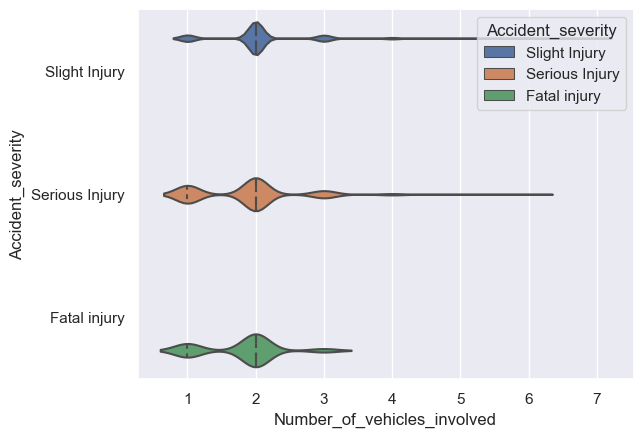

In [69]:
sns.violinplot(data=df, x="Number_of_vehicles_involved",y="Accident_severity",split=False, inner="quart",hue="Accident_severity");

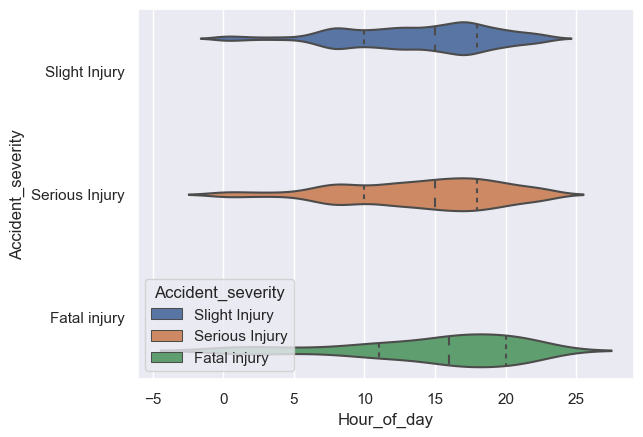

In [70]:
sns.violinplot(data=df, x="Hour_of_day",y="Accident_severity",split=False, inner="quart",hue="Accident_severity");

In [71]:
# remove_outliers_by_featur(df=df, column_name="Hour_of_day", n_std=1.7)

In [72]:
import copy
df_cln = copy.deepcopy(df)
df_cln.shape

(12316, 28)

#### Normalize/scaling/transformation

In [73]:
num_total_duplicates = len(df_cln) - len(df_cln.drop_duplicates())
print(f"Total number of duplicate rows: {num_total_duplicates}")

Total number of duplicate rows: 0


In [74]:
df_cln.sample(2)

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
8440     Tuesday            Over 51          Male  Junior high school   
7382    Thursday              18-30          Male  Junior high school   

     Vehicle_driver_relation Driving_experience Type_of_vehicle  \
8440                   Other          Below 1yr           Other   
7382                Employee          Below 1yr           Other   

     Owner_of_vehicle Area_accident_occured  \
8440            Owner          Office areas   
7382            Owner                 Other   

                                      Lanes_or_Medians  \
8440                                 Undivided Two way   
7382  Two-way (divided with broken lines road marking)   

                     Road_allignment Types_of_Junction Road_surface_type  \
8440  Tangent road with flat terrain           Y Shape     Asphalt roads   
7382  Tangent road with flat terrain       No junction     Asphalt roads   

     Road_surface_conditions Light_conditions Weather_conditions  \
8440                     Dry         Daylight             Normal   
7382                     Dry         Daylight             Normal   

                   Type_of_collision  Number_of_vehicles_involved  \
8440  Vehicle with vehicle collision                            3   
7382      Collision with pedestrians                            1   

      Number_of_casualties Vehicle_movement Casualty_class Sex_of_casualty  \
8440                     1        Reversing     Pedestrian            Male   
7382                     1      Getting off     Pedestrian            Male   

     Age_band_of_casualty Casualty_severity  \
8440             Under 18                 3   
7382              Over 51                 3   

                                    Pedestrian_movement  \
8440                                   Not a Pedestrian   
7382  Crossing from nearside - masked by parked or s...   

              Cause_of_accident Accident_severity  Hour_of_day  
8440  Changing lane to the left     Slight Injury           17  
7382            Moving Backward    Serious Injury           18

In [75]:
y = df_cln["Accident_severity"]
X = df_cln.drop(columns=["Accident_severity"] , axis=1).copy()
print(X.shape, len(y))

(12316, 27) 12316


In [76]:
def encode_categorical_features(df):
    """Encodes categorical features in a pandas DataFrame using label encoding.

    Args:
        df (pandas.DataFrame): The DataFrame containing the features.

    Returns:
        pandas.DataFrame: The DataFrame with encoded categorical features.
    """
    # Select categorical features
    cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']

    # Create a label encoder instance
    le = LabelEncoder()

    # Apply label encoding only to specified categorical columns
    for col in cat_features:
        df[col] = le.fit_transform(df[col])

    # Return the encoded DataFrame
    return df

In [77]:
# Encoding Target classes into numbers
y_encoded = replace_multiple_values(y, replacements={'Slight Injury':0, 'Serious Injury':1, 'Fatal injury':2})

In [78]:
X_encoded = encode_categorical_features(df=X)
X_encoded.head(2)

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   

   Owner_of_vehicle  Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                 3                      9                 5                5   
1                 3                      6                 4                5   

   Types_of_Junction  Road_surface_type  Road_surface_conditions  \
0                  1                  0                        0   
1                  1                  0                        0   

   Light_conditions  Weather_conditions  Type_of_collision  \
0                 3                   2                  3   
1                 3                   2                  8   

   Number_of_vehicles_involved  Number_of_casualties  Vehicle_movement  \
0                            2                     2                 2   
1                            2                     2                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   

   Pedestrian_movement  Cause_of_accident  Hour_of_day  
0                    5                  9           17  
1                    5                 16           17

#### Selecting relevant features (variables) for modeling.

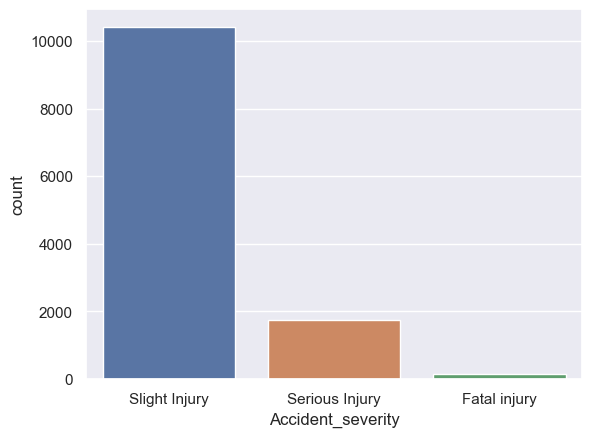

In [79]:
sns.countplot(df_cln, x="Accident_severity")
plt.show()

#### Imbalance Class Handling - Using Upsampling Technique

##### Resampling with Sklean

##### Resampling with SMOTE

In [80]:
from imblearn.over_sampling import SMOTE , ADASYN , BorderlineSMOTE
from imblearn.combine import SMOTEENN

###### SMOTE: Synthetic Minority Oversampling Technique:
* SMOTE is an oversampling technique specifically designed for imbalanced datasets.
* 
It generates synthetic samples for the minority class, overcoming the overfitting problem posed by random oversampling
* How it works:
    - Set the total number of oversampling observations (N). Typically, a 1:1 class distribution is chosen, but this can be adjusted based on need.
    - Randomly select a positive class instance
    - Obtain the K nearest neighbors (usually 5) for that instance
Interpolate new synthetic instances based on the feature space and the differences in distance between the feature vector and its neighbors.

(31245, 27) 31245


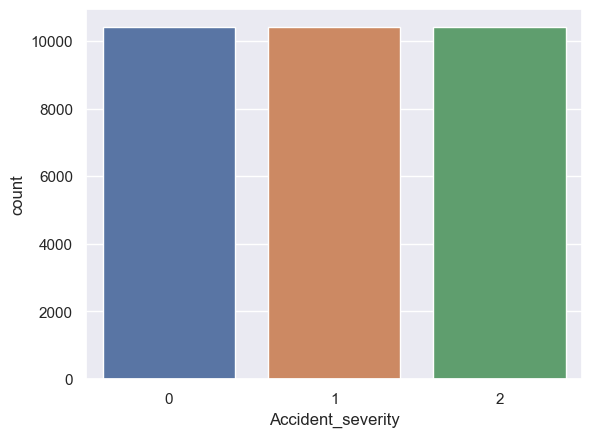

In [81]:
# Apply SMOTE to balance the target classes but it is not good for multiclass
smote = SMOTE(random_state=42 , k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_encoded)
print(X_balanced.shape, len(y_balanced))
sns.countplot(x=y_balanced);

###### ADASYN (Adaptive Synthetic Sampling):
* ADASYN generates synthetic samples for the minority class by focusing on samples that are difficult to classify
* 
It adapts the density distribution of the minority class.

(31527, 27) 31527


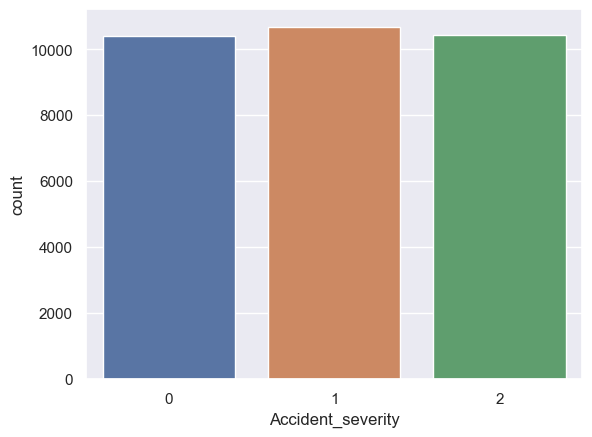

In [82]:
#Assuming you have X_train and y_train
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_adasyn, y_adasyn = adasyn.fit_resample(X_encoded, y_encoded)
print(X_adasyn.shape, len(y_adasyn))
sns.countplot(x=y_adasyn);

##### Borderline-SMOTE:
* Borderline-SMOTE focuses on the borderline instances (near the decision boundary) of the minority class
* 
It generates synthetic samples for these borderline instances.

(31245, 27) 31245


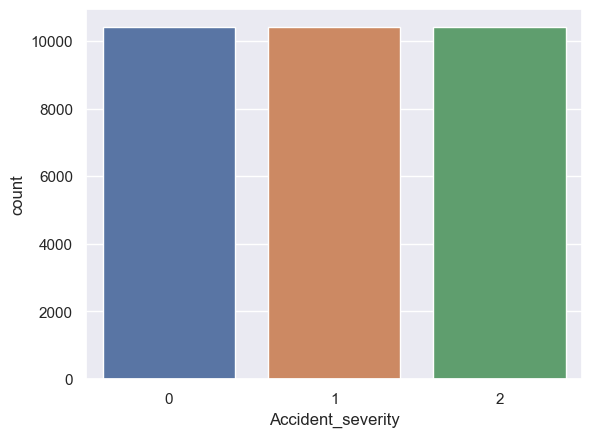

In [83]:
# Assuming you have X_train and y_train
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
X_border, y_border = borderline_smote.fit_resample(X_encoded, y_encoded)
print(X_border.shape, len(y_border))
sns.countplot(x=y_border);

##### Combination Methods:
Combination methods combine multiple resampling techniques But works good with binary Classes..

(24159, 27) 24159


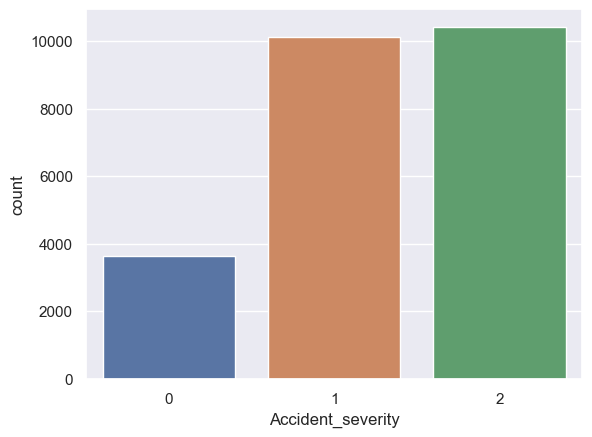

In [84]:
smoteenn = SMOTEENN(random_state=42)
X_combined, y_combined = smoteenn.fit_resample(X_encoded, y_encoded)
print(X_combined.shape, len(y_combined))
sns.countplot(x=y_combined);

#### Feature Selection using mlxtend library

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_border, y_border, test_size=0.2, random_state=42)
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)
X_train_border, X_test_border, y_train_border, y_test_border = train_test_split(X_border, y_border, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [86]:
# Classifiers used for Feature Selections
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)

In [87]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# Multiclass Random Forest Classifier with ExhaustiveFeatureSelector >>> only use this if you have more computing power.
# Feature selector with F1-weighted scoring
sel_rf = EFS(rf, max_features=4, scoring='f1_weighted', cv=5)

In [88]:
# Only run this if have heavy computing power.
# model_rf = sel_rf.fit(X_train,y_train) 

In [89]:
# Classifier for multiclass classification ExhaustiveFeatureSelector only use this if you have more computing power.
lr = LogisticRegression(multi_class='multinomial') # If binary class you can leave empty
# Feature selector with suitable scoring for multiclass
sel_lr = EFS(lr, max_features=4, scoring='f1_weighted', cv=5)

In [90]:
# model_lr = sel_lr.fit(X_train,y_train) # Only run this if have heavy computing power.

#### Feature Selection using sklearn 'SequentialFeatureSelector' 

In [91]:
sfs_rf = SequentialFeatureSelector(rf, n_features_to_select= 25, direction='backward', scoring='f1_weighted', n_jobs=-1,cv=5)
sfs_rf.fit(X_train_border,y_train_border)
# sfs_etc = SequentialFeatureSelector(etc, n_features_to_select= 25, direction='backward', scoring='f1_weighted', n_jobs=-1,cv=5)
# sfs_etc.fit(X_train_border,y_train_border)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=25, n_jobs=-1,
                          scoring='f1_weighted')

In [92]:
# selected_features
selected_feature_indices = np.where(sfs_rf.support_)[0]  # Get indices of selected features
X_train_border = X_train_border.iloc[:,selected_feature_indices]
X_test_border = X_test_border.iloc[:,selected_feature_indices]
X_train_border.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Pedestrian_movement', 'Cause_of_accident',
       'Hour_of_day'],
      dtype='object')

In [93]:
def feature_importance_plot(df, model=None, top_n=25 , figsize=(11,7)):
  """
  Creates a bar plot visualizing feature importances from a model or DataFrame.

  Args:
      df (pd.DataFrame): DataFrame containing features and their importances (optional).
      model (object, optional): Trained model object with feature_importances_ attribute (optional).
      top_n (int, optional): Number of top features to display (default: 10).

  Returns:
      None
  """

  # Check if feature importances are provided in either df or model
  if model is not None:
    feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': model.feature_importances_})
  elif 'Importance' in df.columns:
    feature_importance_df = df.copy()
  else:
    raise ValueError("Feature importances not found in either provided DataFrame or model.")

  # Sort and select top features
  feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
  top_features = feature_importance_df.head(top_n)

  # Create the bar plot with seaborn
  plt.figure(figsize=figsize)
  ax = sns.barplot(x="Importance", y="Feature", data=top_features)
  ax.set_title(f"Top {top_n} Feature Importances")
  ax.set_xlabel("Importance")
  ax.set_ylabel("Feature")    
  plt.show()

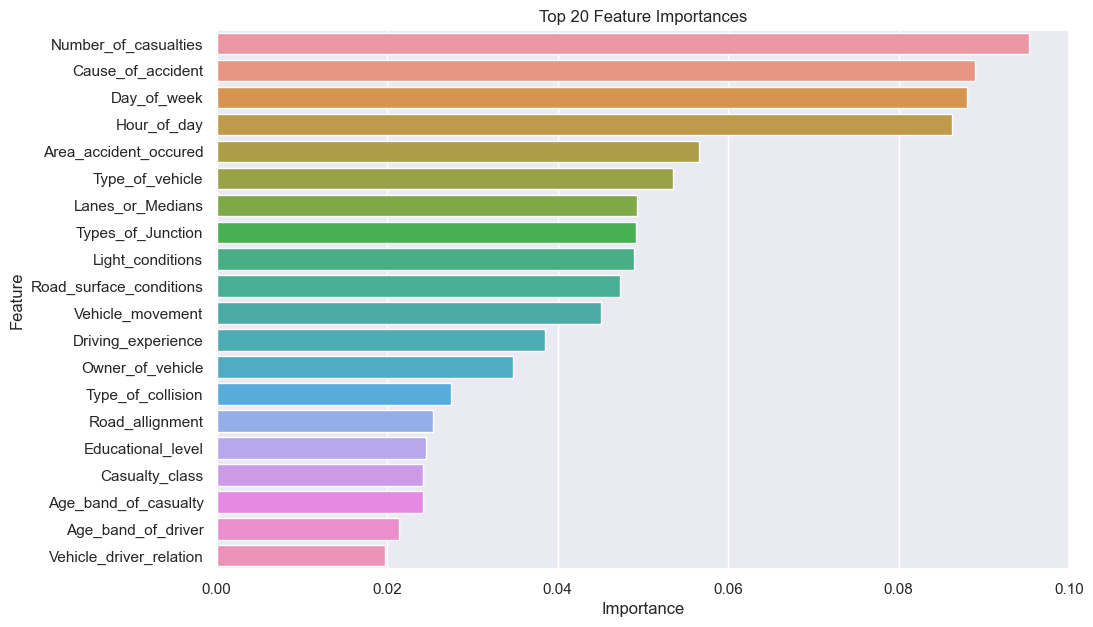

In [94]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier()
# dtc.fit(X_train_balanced, y_train_balanced)
# dtc.fit(X_train_adasyn, y_train_adasyn)
# dtc.fit(X_train_border, y_train_border)
dtc.fit(X_train_border, y_train_border)
# Get feature importance
# dtc_feature_imp = dtc.feature_importances_
# print("Feature Importance:")
# for feature, importance in zip(X.columns, dtc_feature_imp):
#     print(f"{feature}: {importance:.4f}")
feature_importance_plot(df=X_train_border , model=dtc ,top_n=20)

In [95]:
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x=X.columns, y=dtc_feature_imp, orient='v')
# # Add value labels on top of each bar
# for i, v in enumerate(dtc_feature_imp):
#     ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importance")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

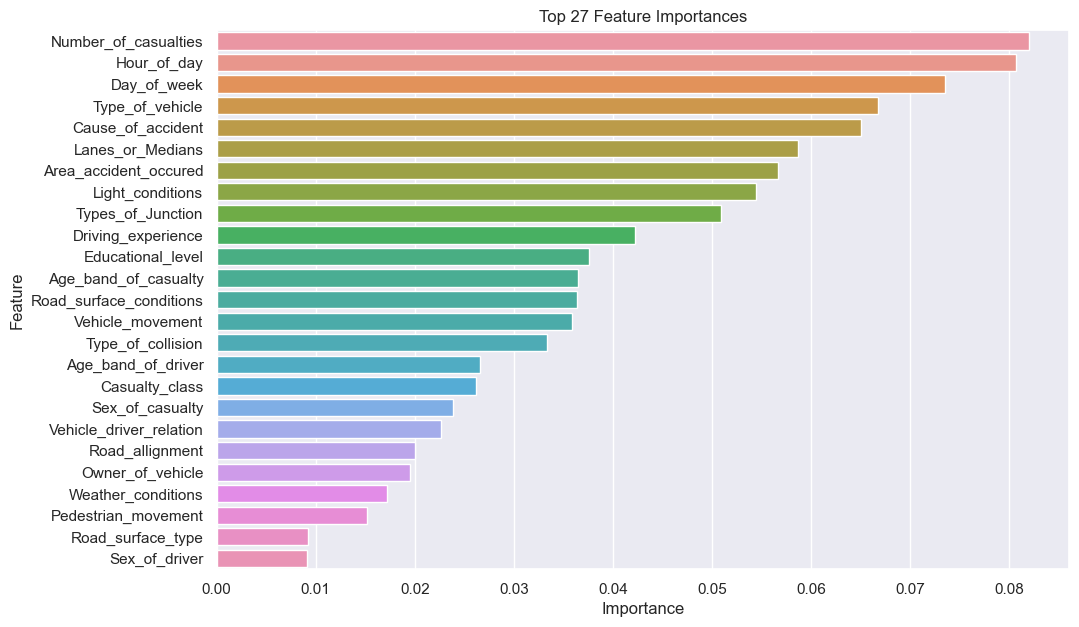

In [96]:
# Getting important features with RF
rfc = RandomForestClassifier()
# rfc.fit(X_train_adasyn, y_train_adasyn)
rfc.fit(X_train_border, y_train_border)
feature_importance_plot(df=X_train_border , model=rfc ,top_n=27)

In [97]:
# # Train a XGBFC classifier
# xgb = XGBRFClassifier()
# xgb.fit(X_train_border, y_train_border)
# # Get feature importance
# feature_importance_plot(df=X_train_border , model=xgb ,top_n=27)

#### Feature Selection using selectkbest

In [98]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_classif, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_classif, k=x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)

    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_classif, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_classif, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)

    return X_train_fs, X_test_fs, fs_info

In [99]:
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train=X_train_border, y_train=y_train_border, X_test=X_test_border)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train=X_train_border, y_train=y_train_border, X_test=X_test_border)

Feature Day_of_week: 143.221080
Feature Age_band_of_driver: 245.534650
Feature Sex_of_driver: 382.112077
Feature Educational_level: 42.881116
Feature Vehicle_driver_relation: 144.060957
Feature Driving_experience: 150.989457
Feature Type_of_vehicle: 20.729987
Feature Owner_of_vehicle: 115.084211
Feature Area_accident_occured: 31.628440
Feature Lanes_or_Medians: 294.759820
Feature Road_allignment: 73.953604
Feature Types_of_Junction: 507.742704
Feature Road_surface_type: 226.513622
Feature Road_surface_conditions: 195.859598
Feature Light_conditions: 1306.109645
Feature Weather_conditions: 208.592867
Feature Type_of_collision: 28.458372
Feature Number_of_casualties: 2135.233151
Feature Vehicle_movement: 195.944769
Feature Casualty_class: 375.716631
Feature Sex_of_casualty: 471.964917
Feature Age_band_of_casualty: 235.866631
Feature Pedestrian_movement: 168.399375
Feature Cause_of_accident: 282.203661
Feature Hour_of_day: 192.386085


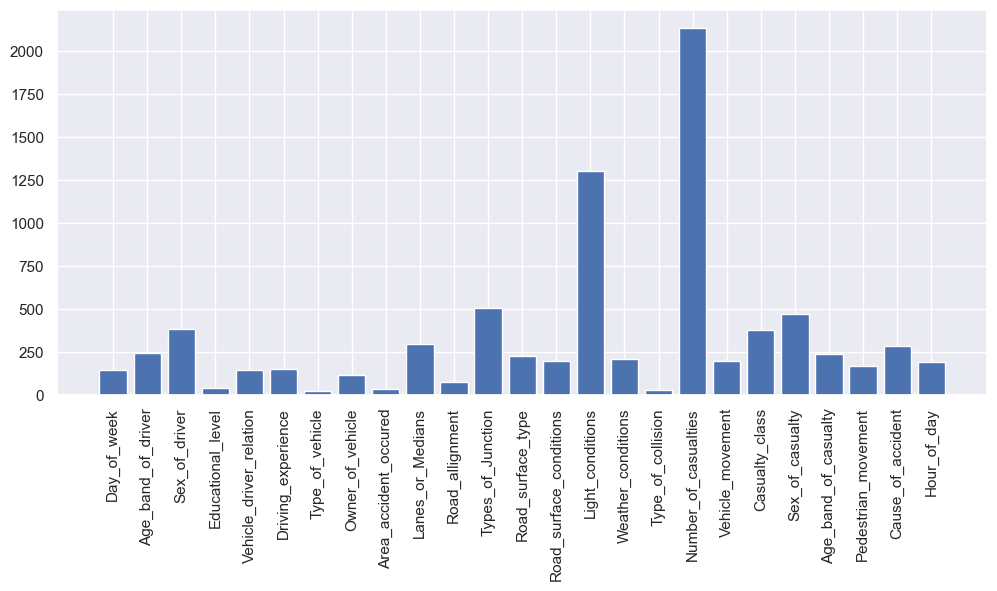

Feature Day_of_week: 0.088668
Feature Age_band_of_driver: 0.008991
Feature Sex_of_driver: 0.014179
Feature Educational_level: 0.030818
Feature Vehicle_driver_relation: 0.045579
Feature Driving_experience: 0.026811
Feature Type_of_vehicle: 0.051129
Feature Owner_of_vehicle: 0.039055
Feature Area_accident_occured: 0.085256
Feature Lanes_or_Medians: 0.087466
Feature Road_allignment: 0.024668
Feature Types_of_Junction: 0.049785
Feature Road_surface_type: 0.023719
Feature Road_surface_conditions: 0.050305
Feature Light_conditions: 0.080762
Feature Weather_conditions: 0.028536
Feature Type_of_collision: 0.016448
Feature Number_of_casualties: 0.107340
Feature Vehicle_movement: 0.019991
Feature Casualty_class: 0.049617
Feature Sex_of_casualty: 0.042650
Feature Age_band_of_casualty: 0.063763
Feature Pedestrian_movement: 0.032736
Feature Cause_of_accident: 0.046771
Feature Hour_of_day: 0.102821


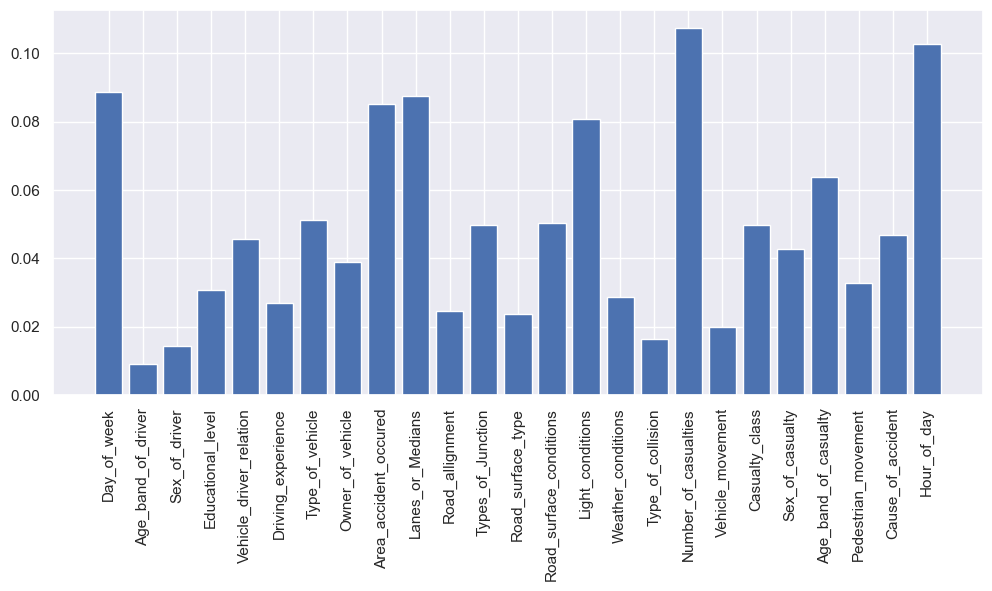

In [100]:
def fs_score_plot(fs_func):
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.figure(figsize=(12,5))
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

fs_score_plot(fs_corr)
fs_score_plot(fs_info)

In [101]:
def features_dist(column_name):
    return pd.concat([df_original[column_name].value_counts() / df_original.shape[0]*100,
        df_cln[column_name].value_counts() / df_cln.shape[0] * 100], axis=1,
        keys=[column_name + '_orginal', column_name + '_clean'])

## 03_Model Selection, Training and Evaluation

### Defining Classifiers/Models

In [102]:
# Create classifiers
classifiers = [
    # SVC(gamma='auto'),
    # NuSVC(gamma='auto'),
    # LinearSVC(),
    SGDClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    LogisticRegressionCV(random_state=42),
    BaggingClassifier(n_estimators=100, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    XGBClassifier(n_estimators=100, random_state=42),
    XGBRFClassifier(n_estimators=100, random_state=42)
]

In [103]:
# Evaluate metrics
def get_accuracy_score(y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model Accuracy: {accuracy:.2f}")
    print(f"Model Precision: {precision:.2f}")
    print(f"Model Recall: {recall:.2f}")
    print(f"Model F1-score: {f1:.2f}")

In [104]:
# Create function for classifiers traning
def train_classifiers(classifiers, X_train, y_train):
    trained_classifiers = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        trained_classifiers[clf.__class__.__name__] = clf
    return trained_classifiers

In [105]:
def train_classifiers_with_cv(classifiers, X, y, n_splits=5):
  """
  Trains classifiers using Stratified K-Fold Cross-Validation.

  Args:
      classifiers (list): List of classifier objects.
      X (array-like): Features data.
      y (array-like): Target labels.
      n_splits (int, optional): Number of folds for cross-validation. Defaults to 5.

  Returns:
      dict: Dictionary containing trained classifiers with their names as keys.
  """

  trained_classifiers = {}
  cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

  for clf in classifiers:
    clf_name = clf.__class__.__name__
    trained_classifiers[clf_name] = clf

    # Use Stratified K-Fold for evaluation
    for train_index, test_index in cv.split(X, y):
      # Use indexing to ensure correct data access
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Train the classifier on the training fold
      trained_classifiers[clf_name].fit(X_train, y_train)

  return trained_classifiers

In [106]:
def get_scores(trained_classifiers, X_test, y_test):
    scores = {}
    for clf_name, clf in trained_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        scores[clf_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }
        # Calculate feature importance (if available)
        # if hasattr(clf, 'feature_importances_'):
        #     importances = clf.feature_importances_
        #     indices = np.argsort(importances)
        #     num_features = 27 # Customize the number of features to display
        #     plt.figure(figsize=(12, 8))
        #     plt.title(f'Feature Importances for {clf_name}')
        #     plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
        #     plt.yticks(range(num_features), X_test.columns)
        #     plt.xlabel('Importance Score')
        #     plt.show()

    return scores

### Training Classifiers with Base and Best Features

#### Training Base Models without Balancing Classes - All 27 Features

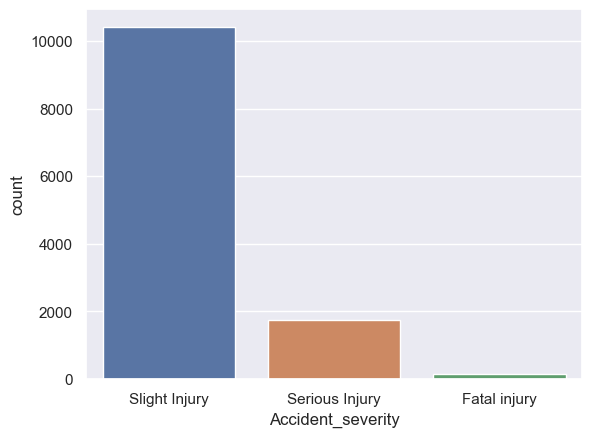

In [107]:
sns.countplot(df_cln, x="Accident_severity");

In [108]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
trained_classifiers_base = train_classifiers(classifiers=classifiers , X_train = X_train_base , y_train = y_train_base) # Option 1 with CV
# trained_classifiers_base = train_classifiers_with_cv(classifiers=classifiers , X = X_train , y = y_train) # Option 2 with CV

##### Base Model Accuracy before Balancing Classes

In [109]:
scores_base_models = get_scores(trained_classifiers_base, X_test_base, y_test_base)
# Visualize results with Base Models 27 Features
df_scores_base_models = pd.DataFrame(scores_base_models)
df_scores_base_models

SGDClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy        0.833604              0.827516            0.837662   
Precision       0.849248              0.732072            0.701678   
Recall          0.833604              0.827516            0.837662   
F1-score        0.762759              0.765276            0.763664   

           LogisticRegressionCV  BaggingClassifier  ExtraTreesClassifier  \
Accuracy               0.837662           0.849026              0.840097   
Precision              0.701678           0.838824              0.821712   
Recall                 0.837662           0.849026              0.840097   
F1-score               0.763664           0.795286              0.770932   

           RandomForestClassifier  XGBClassifier  XGBRFClassifier  
Accuracy                 0.840097       0.844562         0.841315  
Precision                0.814578       0.811104         0.817272  
Recall                   0.840097       0.844562         0.841315  
F1-score                 0.771652       0.798818         0.777370

#### Training Base Models with Balancing Classes - All 27 Features

(31245, 27) 31245


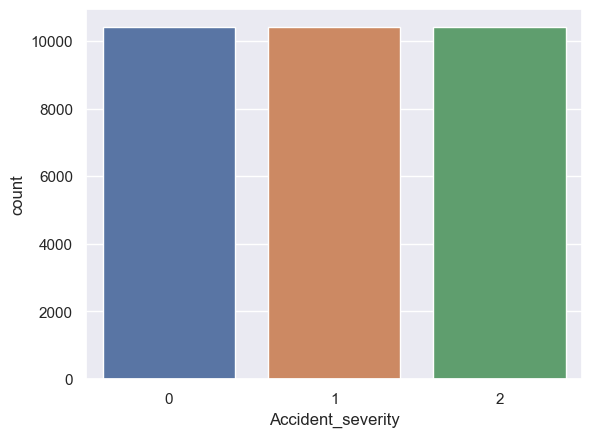

In [110]:
print(X_balanced.shape, len(y_balanced))
sns.countplot(x=y_balanced);

In [111]:
trained_classifiers_base = train_classifiers(classifiers=classifiers , X_train = X_train , y_train = y_train) # Option 1 with CV
# trained_classifiers_base = train_classifiers_with_cv(classifiers=classifiers , X = X_train , y = y_train) # Option 2 with CV

##### Base Model Accuracy after Balancing Classes

In [112]:
scores_base_models = get_scores(trained_classifiers_base, X_test, y_test)
# Visualize results with Base Models 27 Features
df_scores_base_models = pd.DataFrame(scores_base_models)
df_scores_base_models

SGDClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy        0.634662              0.853737            0.641543   
Precision       0.645671              0.878206            0.635630   
Recall          0.634662              0.853737            0.641543   
F1-score        0.613942              0.846537            0.636485   

           LogisticRegressionCV  BaggingClassifier  ExtraTreesClassifier  \
Accuracy               0.656745           0.925748              0.946711   
Precision              0.650033           0.926083              0.947698   
Recall                 0.656745           0.925748              0.946711   
F1-score               0.650350           0.925806              0.946826   

           RandomForestClassifier  XGBClassifier  XGBRFClassifier  
Accuracy                 0.940791       0.916307         0.774684  
Precision                0.941306       0.917744         0.770166  
Recall                   0.940791       0.916307         0.774684  
F1-score                 0.940896       0.916343         0.771849

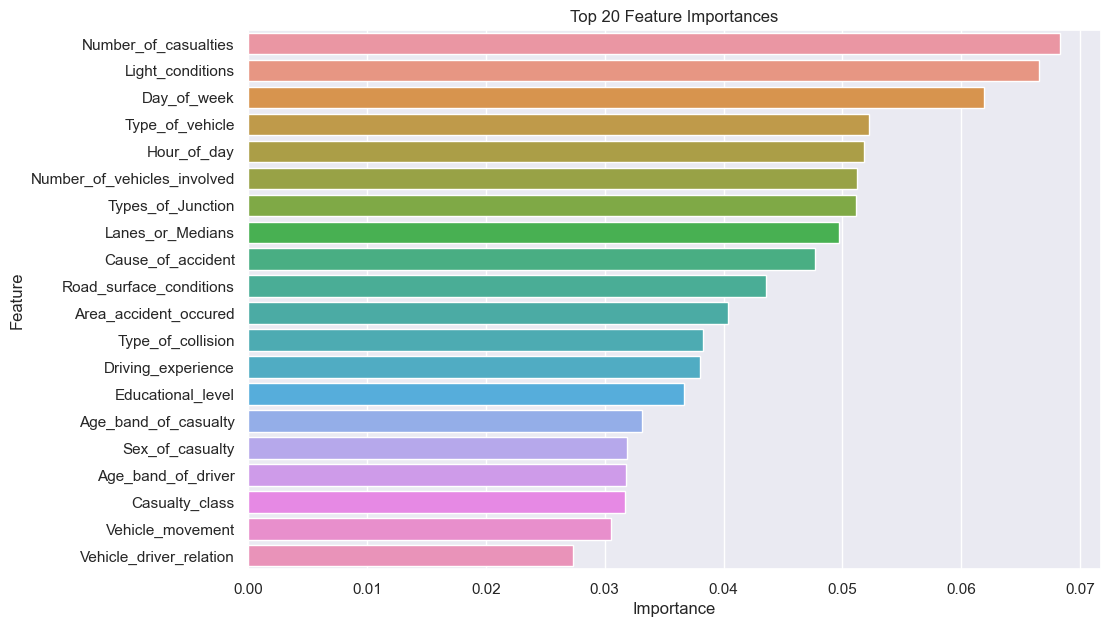

In [113]:
feature_importance_plot(df=X_train , model=trained_classifiers_base["ExtraTreesClassifier"] ,top_n=20)

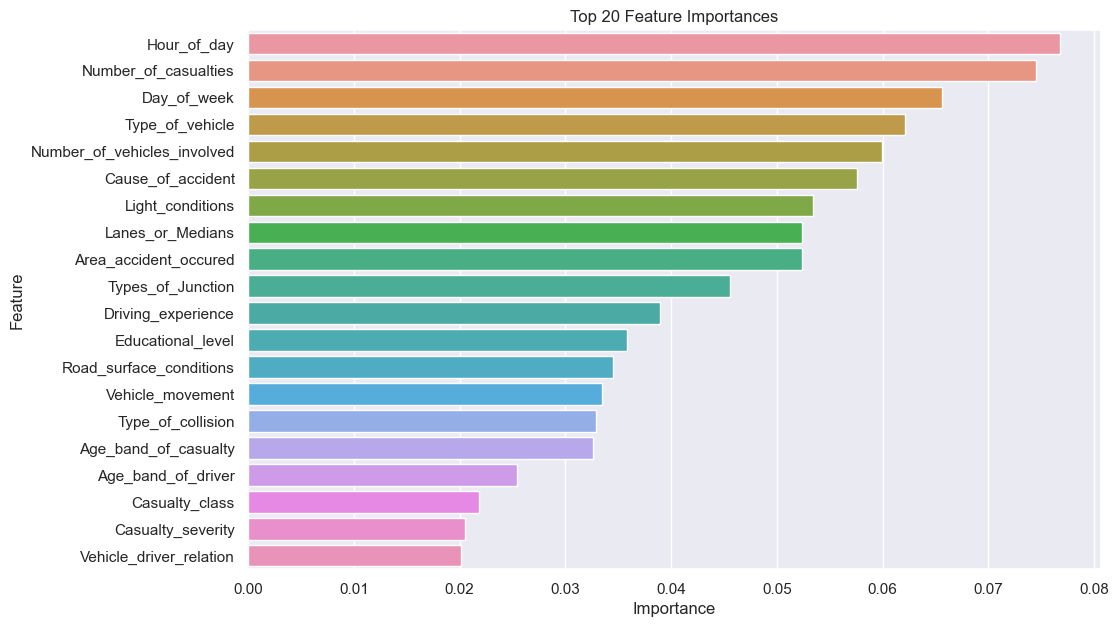

In [114]:
feature_importance_plot(df=X_train , model=trained_classifiers_base["RandomForestClassifier"] ,top_n=20)

#### Training Models / Classifiers with Best Features

In [115]:
trained_classifiers_bf = train_classifiers(classifiers=classifiers , X_train = X_train_border , y_train = y_train_border)
# trained_classifiers_bf = train_classifiers_with_cv(classifiers=classifiers , X = X_train_border , y = y_train_border)

##### Best Features Models Accuracy Scores

In [116]:
scores_bf = get_scores(trained_classifiers_bf, X_test_border, y_test_border)
# Visualize results with Best 25 Features 
df_scores_bf = pd.DataFrame(scores_bf)
df_scores_bf

SGDClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy        0.566011              0.851176            0.602976   
Precision       0.580836              0.876784            0.592987   
Recall          0.566011              0.851176            0.602976   
F1-score        0.556695              0.843675            0.593700   

           LogisticRegressionCV  BaggingClassifier  ExtraTreesClassifier  \
Accuracy               0.606177           0.917107              0.947992   
Precision              0.596776           0.917542              0.948991   
Recall                 0.606177           0.917107              0.947992   
F1-score               0.598172           0.917124              0.948108   

           RandomForestClassifier  XGBClassifier  XGBRFClassifier  
Accuracy                 0.940310       0.910866         0.755481  
Precision                0.941555       0.912961         0.753614  
Recall                   0.940310       0.910866         0.755481  
F1-score                 0.940426       0.910839         0.753719

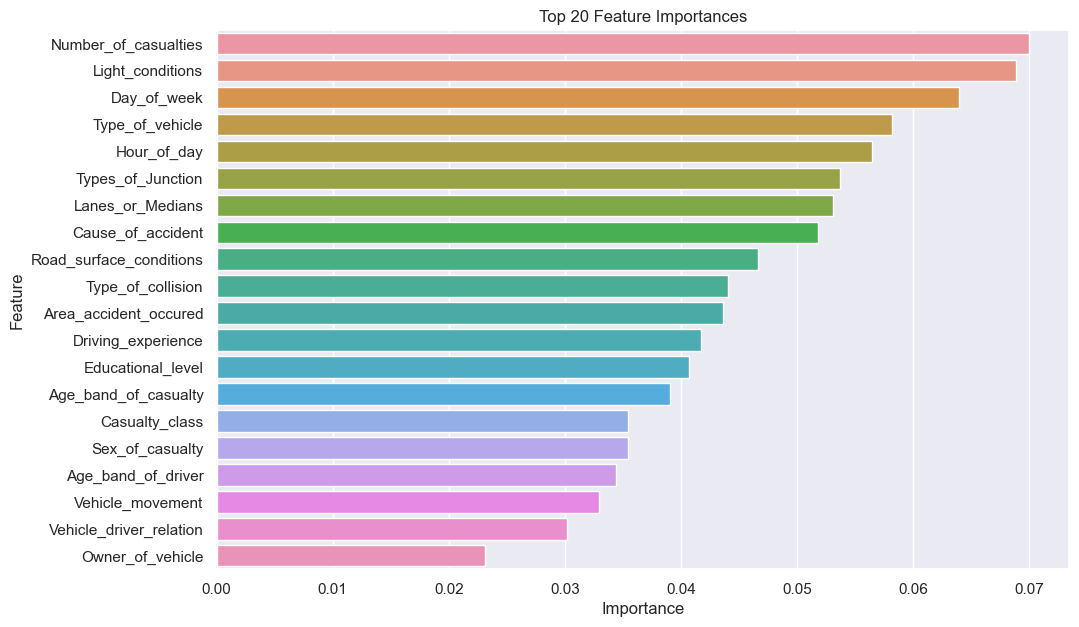

In [117]:
feature_importance_plot(df=X_train_border , model=trained_classifiers_bf["ExtraTreesClassifier"] ,top_n=20)

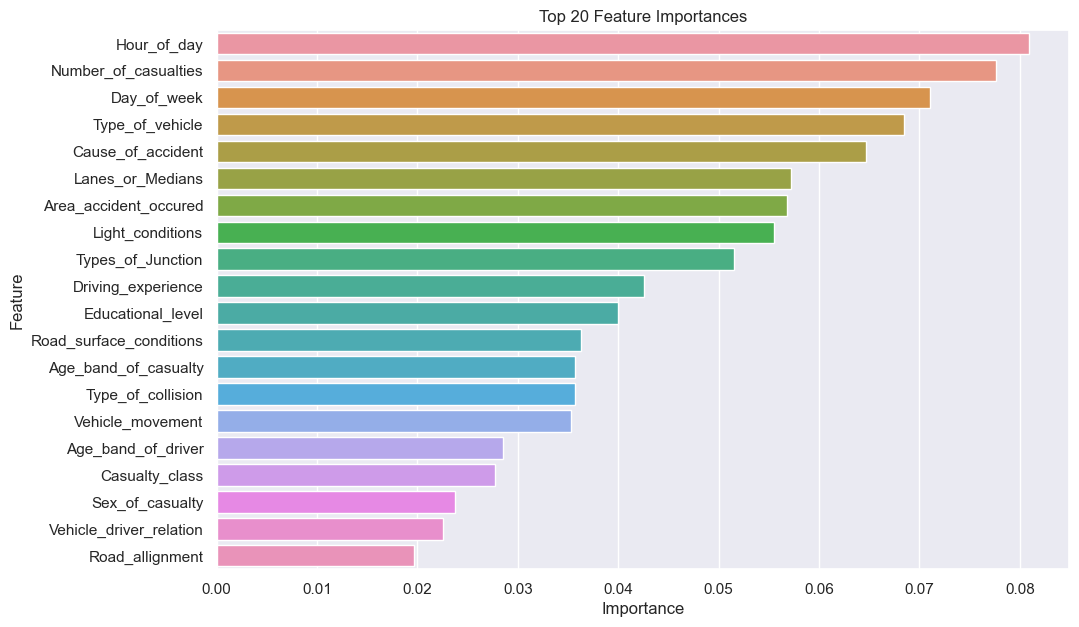

In [118]:
feature_importance_plot(df=X_train_border , model=trained_classifiers_bf["RandomForestClassifier"] ,top_n=20)

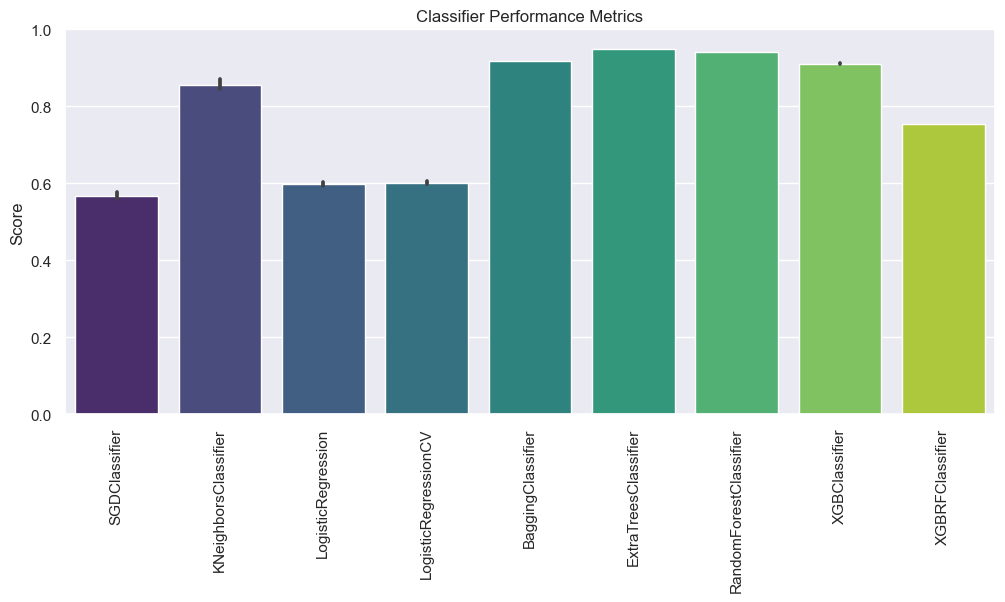

In [119]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_scores_bf, palette='viridis')
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

## 04_Tuning the Model

### Tuning the Model with GridSearchCV

In [120]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 80, 100, 200, 250],  # Number of trees in the forest
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2'], # Maximum features considered for each split or "max_features": [3, 5]
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2], # Minimum number of samples required at each leaf node.
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}
# Create the Extra Tree Classifier
etc_model = ExtraTreesClassifier(random_state=42)

In [121]:
# Initialize K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=etc_model, param_grid=param_grid, 
                           cv=skf, scoring='f1_weighted',n_jobs=-1)

In [125]:
# Fit the model to the training data 
# grid_search.fit(X_train_border, y_train_border)

In [126]:
# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Score:", best_score)
# display("Best Parameters:", best_params)

In [127]:
# Creating a new Extra Tree model using the best parameters obtained by GridSearchCV
best_params = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30,'max_features': 'log2','min_samples_leaf': 1,
               'min_samples_split': 2,'n_estimators': 250}
best_etc_model = ExtraTreesClassifier(random_state=42 ,**best_params)
best_etc_model.fit(X_train_border, y_train_border)
# Predict on the test set
y_pred = best_etc_model.predict(X_test_border)
get_accuracy_score(y_test_border, y_pred)

Model Accuracy: 0.95
Model Precision: 0.95
Model Recall: 0.95
Model F1-score: 0.95


### Tuning the Model with Optuna

In [129]:
import optuna
from optuna.integration import sklearn

**Optuna** is a powerful Python library for hyperparameter optimization. It automates the process of selecting optimal hyperparameters through various optimization algorithms, including **Tree-structured Parzen Estimator (TPE)**. Optuna is also framework-agnostic, meaning you can use it with any machine learning or deep learning framework.

It is a helpful tool for automating the process of tuning hyperparameters in machine learning. Here's a breakdown of how it works:

**1. Objective Function:**

* You define a function that trains your model with a specific set of hyperparameters and evaluates its performance on a validation set. This function returns the evaluation metric (e.g., accuracy, F1 score) as a score.

**2. Search Space:**

* You tell Optuna the possible range of values for each hyperparameter you want to tune. This can be done using functions like `trial.suggest_uniform` (for continuous values) or `trial.suggest_categorical` (for discrete choices).

**3. Samplers:**

* Optuna uses different algorithms (samplers) to explore the search space and identify promising hyperparameter combinations. Some common samplers include:
   * Grid Search: Tries every combination of hyperparameter values within the defined ranges (can be computationally expensive for many parameters).
   * Random Search: Randomly samples hyperparameter values from the search space.
   * Bayesian Optimization: Uses past evaluations to intelligently select the next hyperparameter configuration to try.

**4. Optimization Loop:**

* Optuna iterates through the following steps:
    * The sampler suggests a new set of hyperparameters.
    * Your objective function trains the model with these hyperparameters and returns the evaluation score.
    * Optuna uses this score to update its internal model and guide the search for better hyperparameters.

**5. Best Hyperparameters:**

* After a certain number of trials (iterations), Optuna suggests the hyperparameter combination that achieved the best score on the validation set. You can use these hyperparameters to train your final model on the entire training data.

**Benefits of Optuna:**

* Saves time and resources compared to manual hyperparameter tuning.
* Often finds better hyperparameters than random search.
* Offers different samplers ting with optuna ON Medium medium.com]

In [130]:
class StopWhenTrialKeepBeingPrunedCallback:
    def __init__(self, threshold: int):
        self.threshold = threshold
        self._consequtive_pruned_count = 0

    def __call__(self, study: optuna.study.Study, trial: optuna.trial.FrozenTrial) -> None:
        if trial.state == optuna.trial.TrialState.PRUNED:
            self._consequtive_pruned_count += 1
        else:
            self._consequtive_pruned_count = 0

        if self._consequtive_pruned_count >= self.threshold:
            study.stop()
study_stop_cb = StopWhenTrialKeepBeingPrunedCallback(2)

In [131]:
# Define your objective function (replace with your actual evaluation metric)
def objective(trial):
  # Suggest hyperparameters
  n_estimators = trial.suggest_int("n_estimators", 100, 1000)
  max_depth = trial.suggest_int("max_depth", 10, 50)
  min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
  min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

  # Create and train the model with suggested hyperparameters
  model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
  model.fit(X_train, y_train)

  # Evaluate the model on the validation set (replace with your validation logic)
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)

  # Return the negative accuracy (Optuna minimizes the objective)
  return -accuracy

# Load your data (X: features, y: target labels)
X_train, X_val, y_train, y_val = train_test_split(X_border, y_border, test_size=0.2)

# Create the Optuna study
study = optuna.create_study(direction="minimize")

# Optimize the objective function for a specified number of trials
study.optimize(objective, n_trials=20 , callbacks=[study_stop_cb])

# Get the best hyperparameters
best_params = study.best_params

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

[I 2024-03-31 14:41:13,133] A new study created in memory with name: no-name-3aed7c45-6dd4-45dc-9041-8b3288d74517
[I 2024-03-31 14:41:26,883] Trial 0 finished with value: -0.9207873259721555 and parameters: {'n_estimators': 488, 'max_depth': 38, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.9207873259721555.
[I 2024-03-31 14:41:47,084] Trial 1 finished with value: -0.9067050728116499 and parameters: {'n_estimators': 935, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.9207873259721555.
[I 2024-03-31 14:42:07,910] Trial 2 finished with value: -0.9390302448391743 and parameters: {'n_estimators': 629, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: -0.9390302448391743.
[I 2024-03-31 14:42:27,326] Trial 3 finished with value: -0.9143863018082893 and parameters: {'n_estimators': 793, 'max_depth': 34, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 2 w

Best hyperparameters: {'n_estimators': 691, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1}


ExtraTreesClassifier(max_depth=26, n_estimators=691)


**Explanation:**

1. **Objective Function:** This function defines how Optuna evaluates a set of hyperparameters. You'll need to replace `accuracy_score` with your desired evaluation metric (e.g., F1 score, ROC AUC).
2. **Hyperparameter Suggestions:** Optuna uses functions like `suggest_int` to define the search space for each hyperparameter. You can adjust the ranges based on your needs.
3. **Model Training:** The function trains a Random Forest model with the suggested hyperparameters and evaluates it on the validation set.
4. **Optimization Loop:** Optuna iterates through trials, suggesting hyperparameters, evaluating the model, and updating its internal model for better exploration.
5. **Best Hyperparameters:** After a set number of trials, Optuna suggests the best hyperparameter combination found so far.
6. **Final Training:** The code then trains a final model with the best hyperparameters on the entire training data.

**Note:**

* This is a basic example. You might need to adjust the hyperparameters and objective function depending on your specific problem.
* Consider using techniques like early topping to improve efficiency during hyperparparameter tuning.


In [134]:
# Creating a new Extra Tree model using the best parameters obtained by Optuna
best_params = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 26,'max_features': 'log2','min_samples_leaf': 1,
               'min_samples_split': 2,'n_estimators': 691}
best_etc_model = ExtraTreesClassifier(random_state=42 ,**best_params)
best_etc_model.fit(X_train_border, y_train_border)
# Predict on the test set
y_pred = best_etc_model.predict(X_test_border)

##### **GridSearchCV VS. Optuna**
Both Optuna and GridSearchCV are tools used for hyperparameter tuning in machine learning, but they take different approaches:

**GridSearchCV:**

* **Exhaustive Search:** GridSearchCV tries out every single combination of hyperparameter values defined within the specified ranges. This can be computationally expensive, especially for problems with many hyperparameters.
* **Simple and Easy to Use:**  GridSearchCV is part of the scikit-learn library and has a straightforward interface. It's a good choice for beginners or when dealing with a small number of hyperparameters.
* **Limited Adaptability:** GridSearchCV doesn't learn from past evaluations. It simply tries every combination blindly. 

**Optuna:**

* **Intelligent Search:** Optuna uses various algorithms (samplers) to explore the search space more efficiently. It avoids redundant evaluations and focuses on promising regions based on past results. This can be much faster, especially for large search spaces.
* **Flexibility:** Optuna offers different samplers like Random Search and Bayesian Optimization. You can choose the sampler that best suits your problem and data size. 
* **Steeper Learning Curve:**  Optuna requires a bit more code compared to GridSearchCV. However, the benefits in terms of efficiency and finding better hyperparameters often outweigh the initial learning curve.

Here's a table summarizing the key differences:

| Feature                 | GridSearchCV          | Optuna                               |
|--------------------------|------------------------|---------------------------------------|
| Search Strategy         | Exhaustive Grid Search | Various Search Algorithms (Samplers)  |
| Efficiency              | Lower (can be slow)    | Higher (more efficient)                |
| Adaptability             | Limited               | More adaptable based on past results   |
| Ease of Use             | Easier                | Steeper Learning Curve                |
| Suitable for             | Few Hyperparameters    | Many Hyperparameters                   |

In general, Optuna is the preferred choice for most machine learning tasks due to its efficiency and ability to find better hyperparameters. However, GridSearchCV can still be a good option for simpler problems or when you need a more straightforward approach.


## 05_Evaluating Tuned Models

In [135]:
y_pred = best_model.predict(X_val)
get_accuracy_score(y_val, y_pred)

Model Accuracy: 0.95
Model Precision: 0.95
Model Recall: 0.95
Model F1-score: 0.95


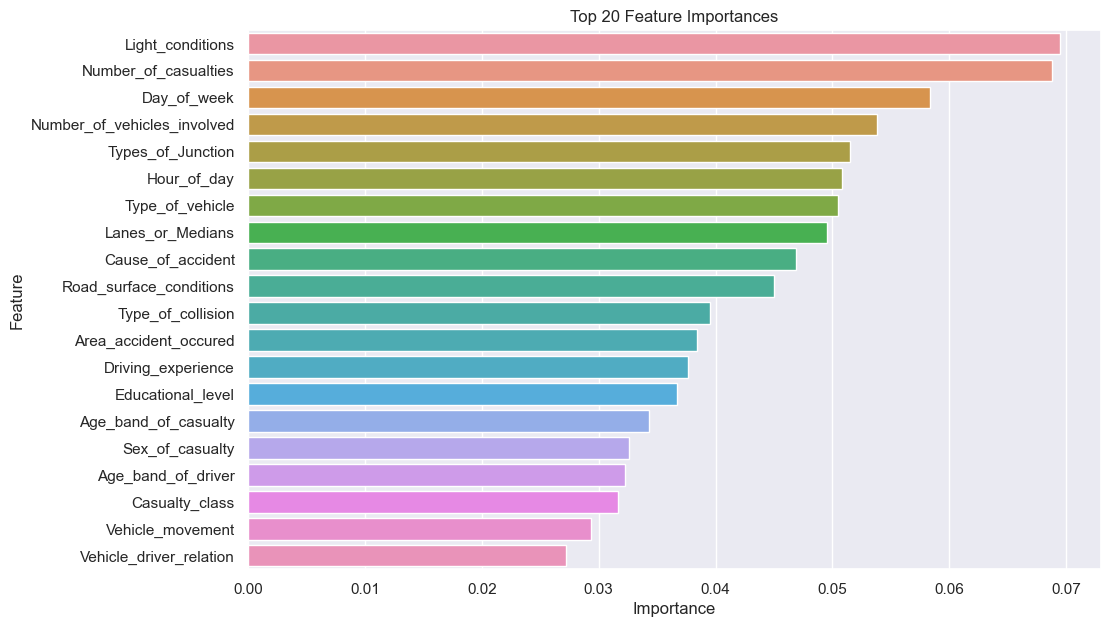

In [136]:
feature_importance_plot(df=X_train , model=best_model ,top_n=20)

[[702 688 674]
 [730 698 694]
 [748 687 628]]


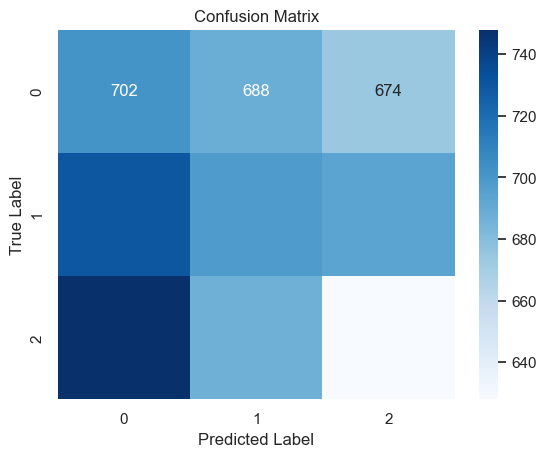

In [144]:
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels (y_true) and predicted labels (y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test_border, y_pred)

# Print the confusion matrix (optional)
print(cm)

# Visualization with two-digit formatting
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap with integer formatting
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")  # Use 'd' for integer formatting

# Customize plot elements (optional)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label");

## 06_Communicating the Result/Report

### Exloring with libraires to use 'LIME' , 'XAI' , 'Evendintly' , 'Yellowbricks' , 'DeepLIFT' 'SHAP'

#### Generating Interpretability Report with SHAP

🎯 Working on .......

#### Generating Interpretability Report with LIME

🎯 Working on .......

In [146]:
import lime
from lime import lime_tabular  # Import the specific function

In [147]:
# Create LIME explainer (adjust for your model type and feature names)
# explainer = lime_tabular(X_train, X_train.columns, mode='classification')  # Adjust mode if needed

# # Explain the instance
# explanation = explainer.explain_instance(instance, class_names=range(best_model.n_classes_))

# # Print LIME explanation (adjust output format if needed)
# print("LIME Explanation:")
# print(explanation.as_text())  # Consider using explanation.as_pyplot_fig() for visualization


#### Generating Interpretability Report with deepLIFT

🎯 Working on .......

In [ ]:
import deeplift as dl
# Load your trained model (replace with your actual model)
model = best_model

# Load a single data instance for explanation (adjust indexing for your data)
instance = X_train.iloc[0].values.reshape(1, -1)  # Reshape for single instance

# Target class for explanation (if applicable)
target_class = None  # Adjust if you want to explain prediction for a specific class


# Define DeepLIFT explainer (replace with your specific model architecture)
def deeplift_explainer(predicted_class):
  # DeepLIFT explainer logic specific to your model architecture
  return dl.Rescale(dl.GradientShap(model, reference_input=reference_input))  # Adjust as needed

# Load reference input (optional, consider using mean or median of training data)
reference_input = np.random.rand(1, instance.shape[1])  # Replace with your reference input strategy

# Get DeepLIFT explainer for the target class (if applicable)
deeplift_exp = deeplift_explainer(target_class)

# Calculate DeepLIFT scores
scores = deeplift_exp.explain(instance)

# Print DeepLIFT explanation (adjust output format if needed)
print("\nDeepLIFT Explanation:")
# Print individual feature scores or a summary
print(f"Feature Scores: {scores}")  # Or consider printing a more informative summary